In [32]:
import os
import sys
sys.path.append("../../../")

from rnns_architectures.intrinsec import *
from rnns_architectures.utils import *
from IT_SHAP import TFWrapper, XAI_utils, utils_visualizations_IT_SHAP
from IT_SHAP.IT_SHAP import local_report
from tensorflow.keras.models import load_model
import seaborn as sns
import matplotlib.pyplot as plt

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import pickle
import random, os, json
import time

import warnings
warnings.filterwarnings("ignore")

In [2]:
time = 10
norm = "robustNorm"

# EXPLAINABILITY. IT-SHAP

In [3]:
features =  ['year',
       'Current_Assets', 'COGS', 'Depreciation_Amortization', 'EBITDA',
       'Inventory', 'Net_Income', 'Receivables', 'Market_Value', 'Net_Sales',
       'Total_Assets', 'Long-term_Debt', 'EBIT', 'Gross_Profit',
       'Current_Liabilities', 'Retained_Earnings', 'Total_Revenue',
       'Total_Liabilities', 'Operating_Expenses']

print("# of features: ", len(features))

# Show the features in the plot with a clinical order
new_order = ['year',
       'Current_Assets', 'COGS', 'Depreciation_Amortization', 'EBITDA',
       'Inventory', 'Net_Income', 'Receivables', 'Market_Value', 'Net_Sales',
       'Total_Assets', 'Long-term_Debt', 'EBIT', 'Gross_Profit',
       'Current_Liabilities', 'Retained_Earnings', 'Total_Revenue',
       'Total_Liabilities', 'Operating_Expenses']

feature_idx = {feature: idx for idx, feature in enumerate(features)}
reordered_indices = [feature_idx[feature] for feature in new_order]

# of features:  19


### Final name of the variables in the visualization 

In [4]:
final_order = ['Year',
               'Current Assets', 'COGS', 'Depreciation Amortization', 'EBITDA',
               'Inventory', 'Net Income', 'Receivables', 'Market Value', 'Net Sales',
               'Total Assets', 'Long-term Debt', 'EBIT', 'Gross Profit',
               'Current Liabilities', 'Retained Earnings', 'Total Revenue',
               'Total Liabilities', 'Operating Expenses']

## Load each split and model and save the IT-SHAP values

# SPLIT 1

In [5]:
directory = './Results_LSTM'
split = "s1"
norm = "robustNorm"

### POPULATION

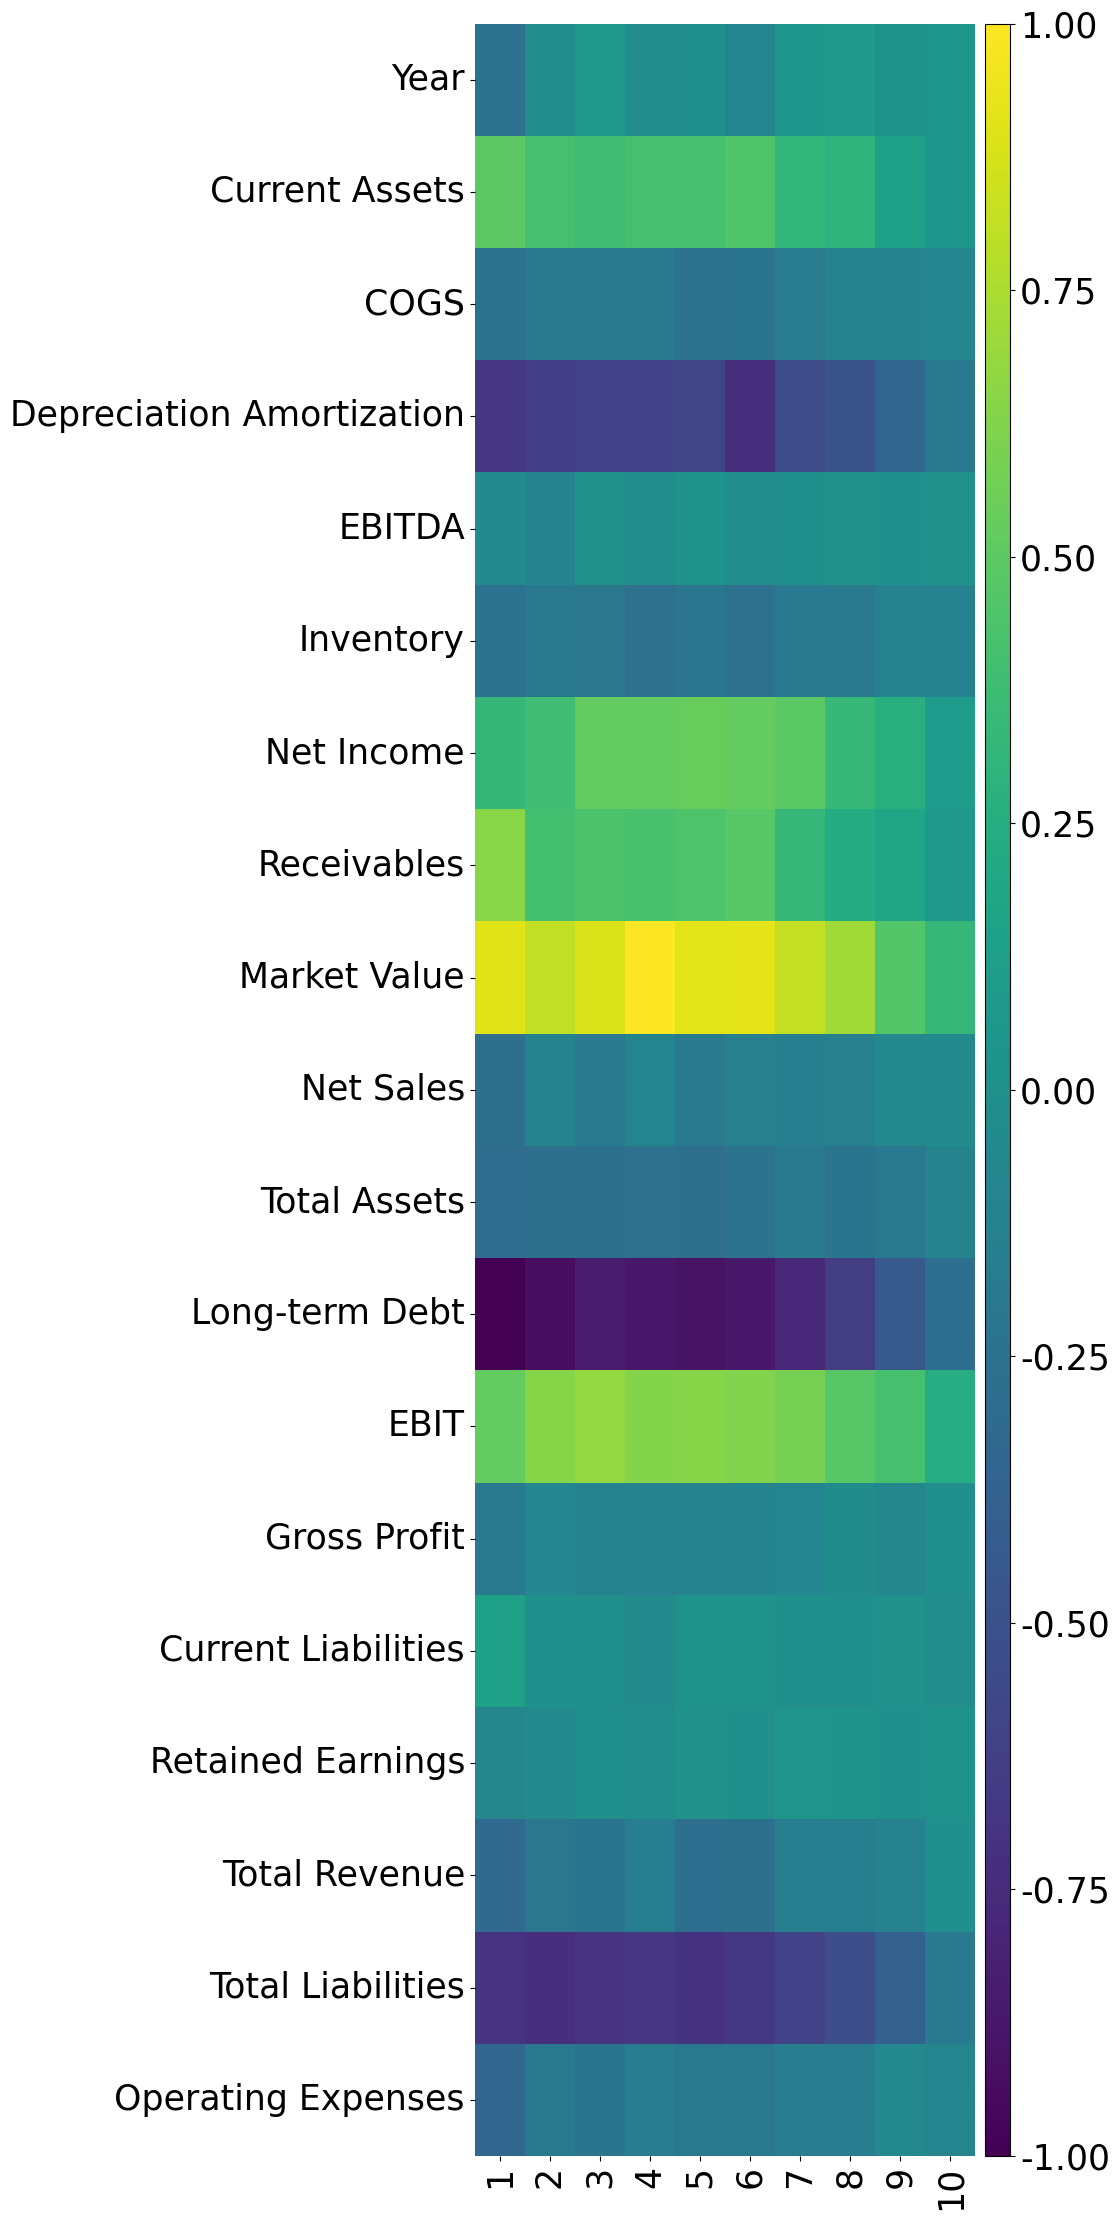

In [6]:
split_shap = utils_visualizations_IT_SHAP.load_from_pickle(os.path.join(directory, f"results_shap_{split}.pkl"))
matrix_pop = utils_visualizations_IT_SHAP.plot_shap_normalized(split_shap, features, reordered_indices, final_order,
                                                    f"../Figures/POST-HOC/SHAP_{split}_population_lstm.pdf", time, save_img=True)

### BANKRUPTCY ENTERPRISES

In [7]:
ign_pat = []
X_test = np.load(f"../../../DATA/BANK/{split}/X_test_tensor_{norm}.npy")
for idx_pat in range(X_test.shape[0]):
    X = X_test[idx_pat]
    rows_filtered = np.any(X == 666, axis=-1)
    if len(rows_filtered[rows_filtered == False]) == 1:
        ign_pat.append(idx_pat)
        
y_test = pd.read_csv(f"../../../DATA/BANK/{split}/y_test_tensor_{norm}.csv")
y_test_f = y_test.loc[:, 'individualMRGerm'].values.reshape(y_test.shape[0] // time, time)
y_test_f = np.delete(y_test_f, ign_pat, axis=0)
y_test_f.shape

(1762, 10)

In [8]:
import copy
list_of_dfs = copy.deepcopy(split_shap)
array_pacientes = y_test_f

split_shap_amr = []

for i in range(len(list_of_dfs)):
    patient_shap = list_of_dfs[i]
    amr_status = array_pacientes[i]  

    for col in patient_shap.columns:
        if amr_status[col - 1] == 0:
            patient_shap.loc[:, col] = np.nan #Nonbankruptcy patients are set to Nan
        else:
            patient_shap.loc[:, col] = patient_shap.loc[:, col] #bankruptcy patients keep the info

    split_shap_amr.append(patient_shap)


**Visualize the BANKRUPTCY data without normalization**

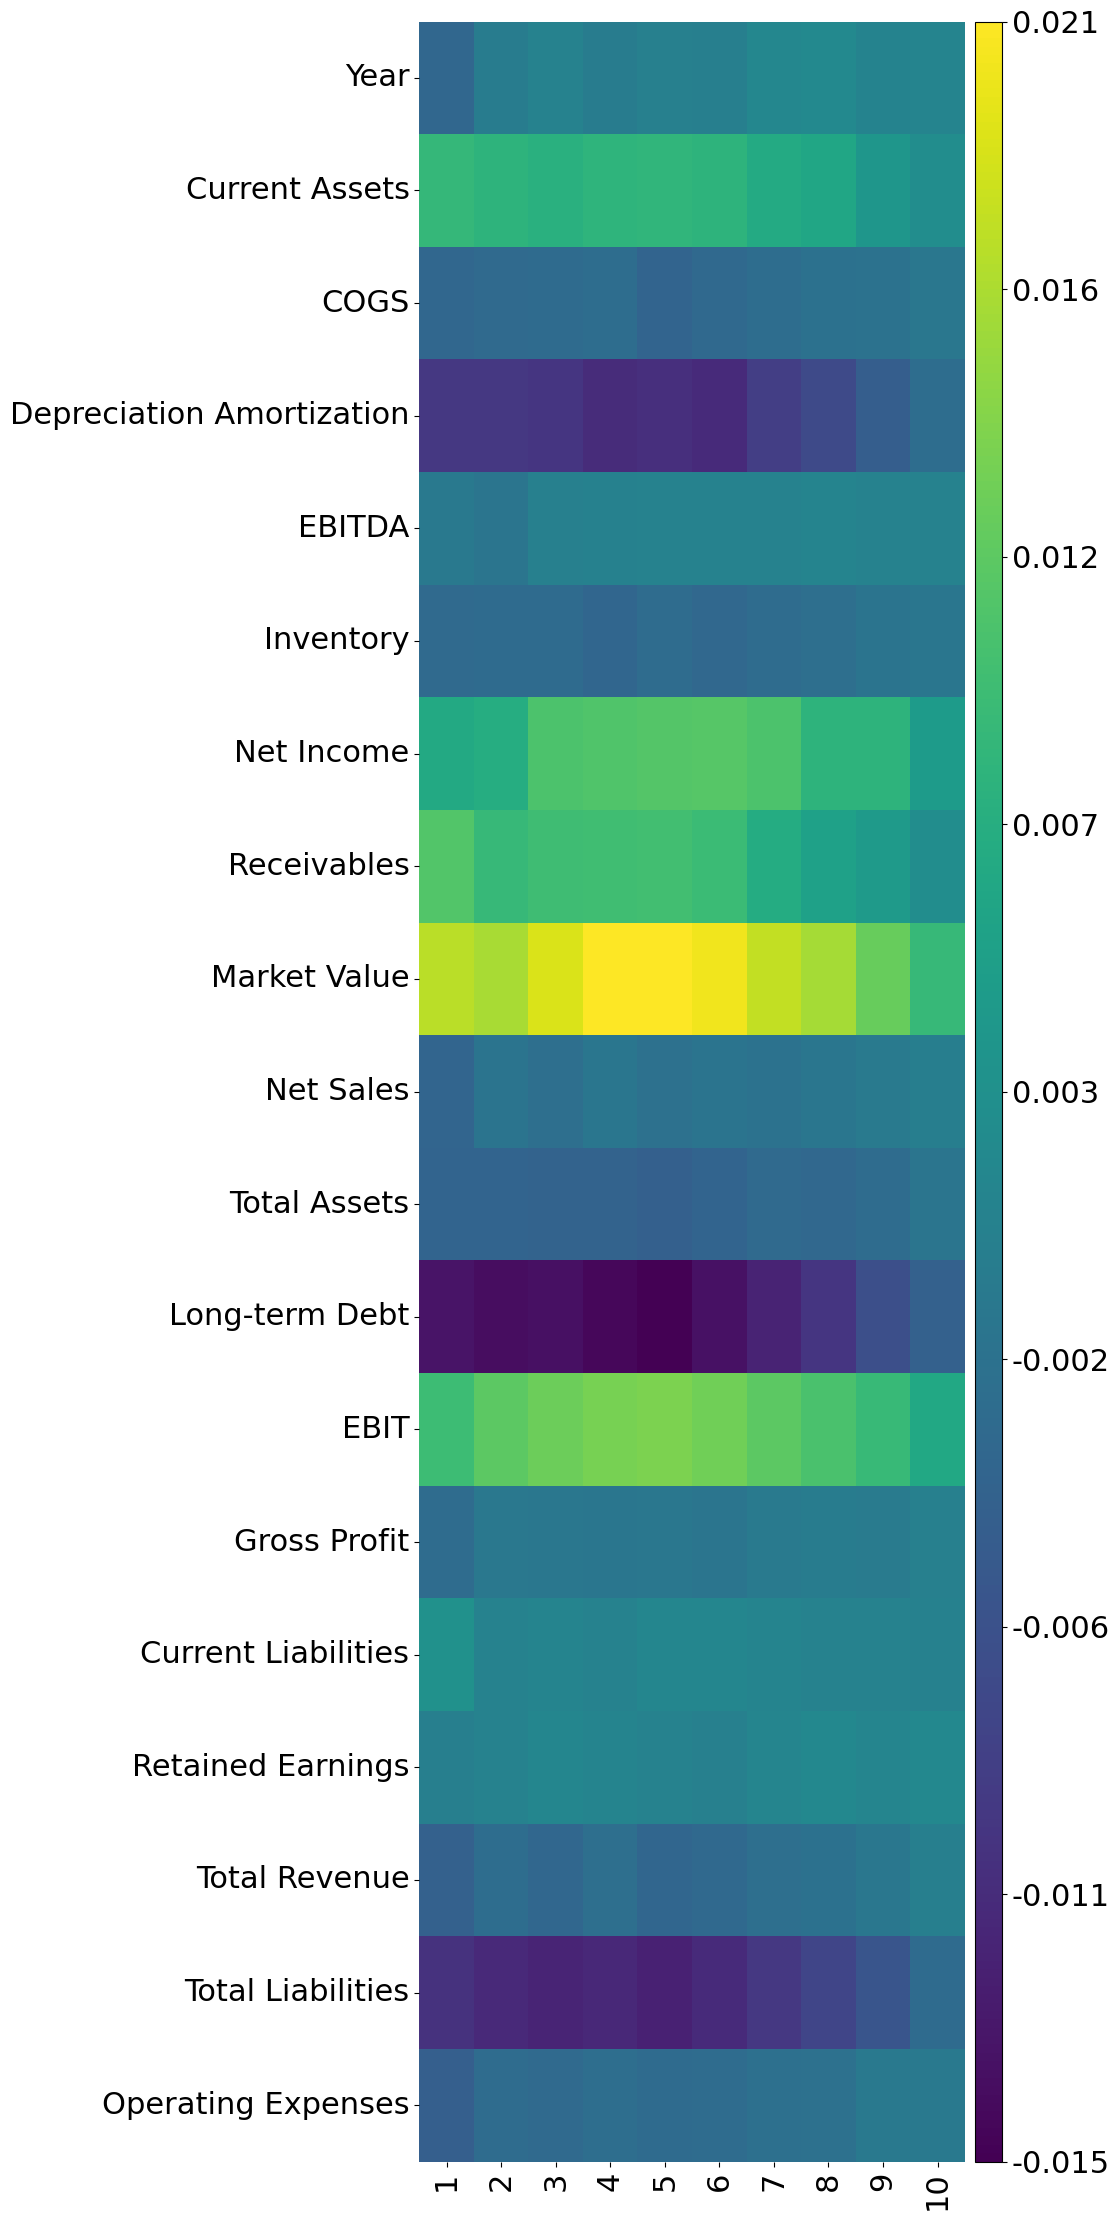

In [9]:
matrix_amr = utils_visualizations_IT_SHAP.plot_shap(split_shap_amr, features, reordered_indices, final_order,
                                                    f"", time, save_img=False)

**Visualize the BANKRUPTCY data with normalization**

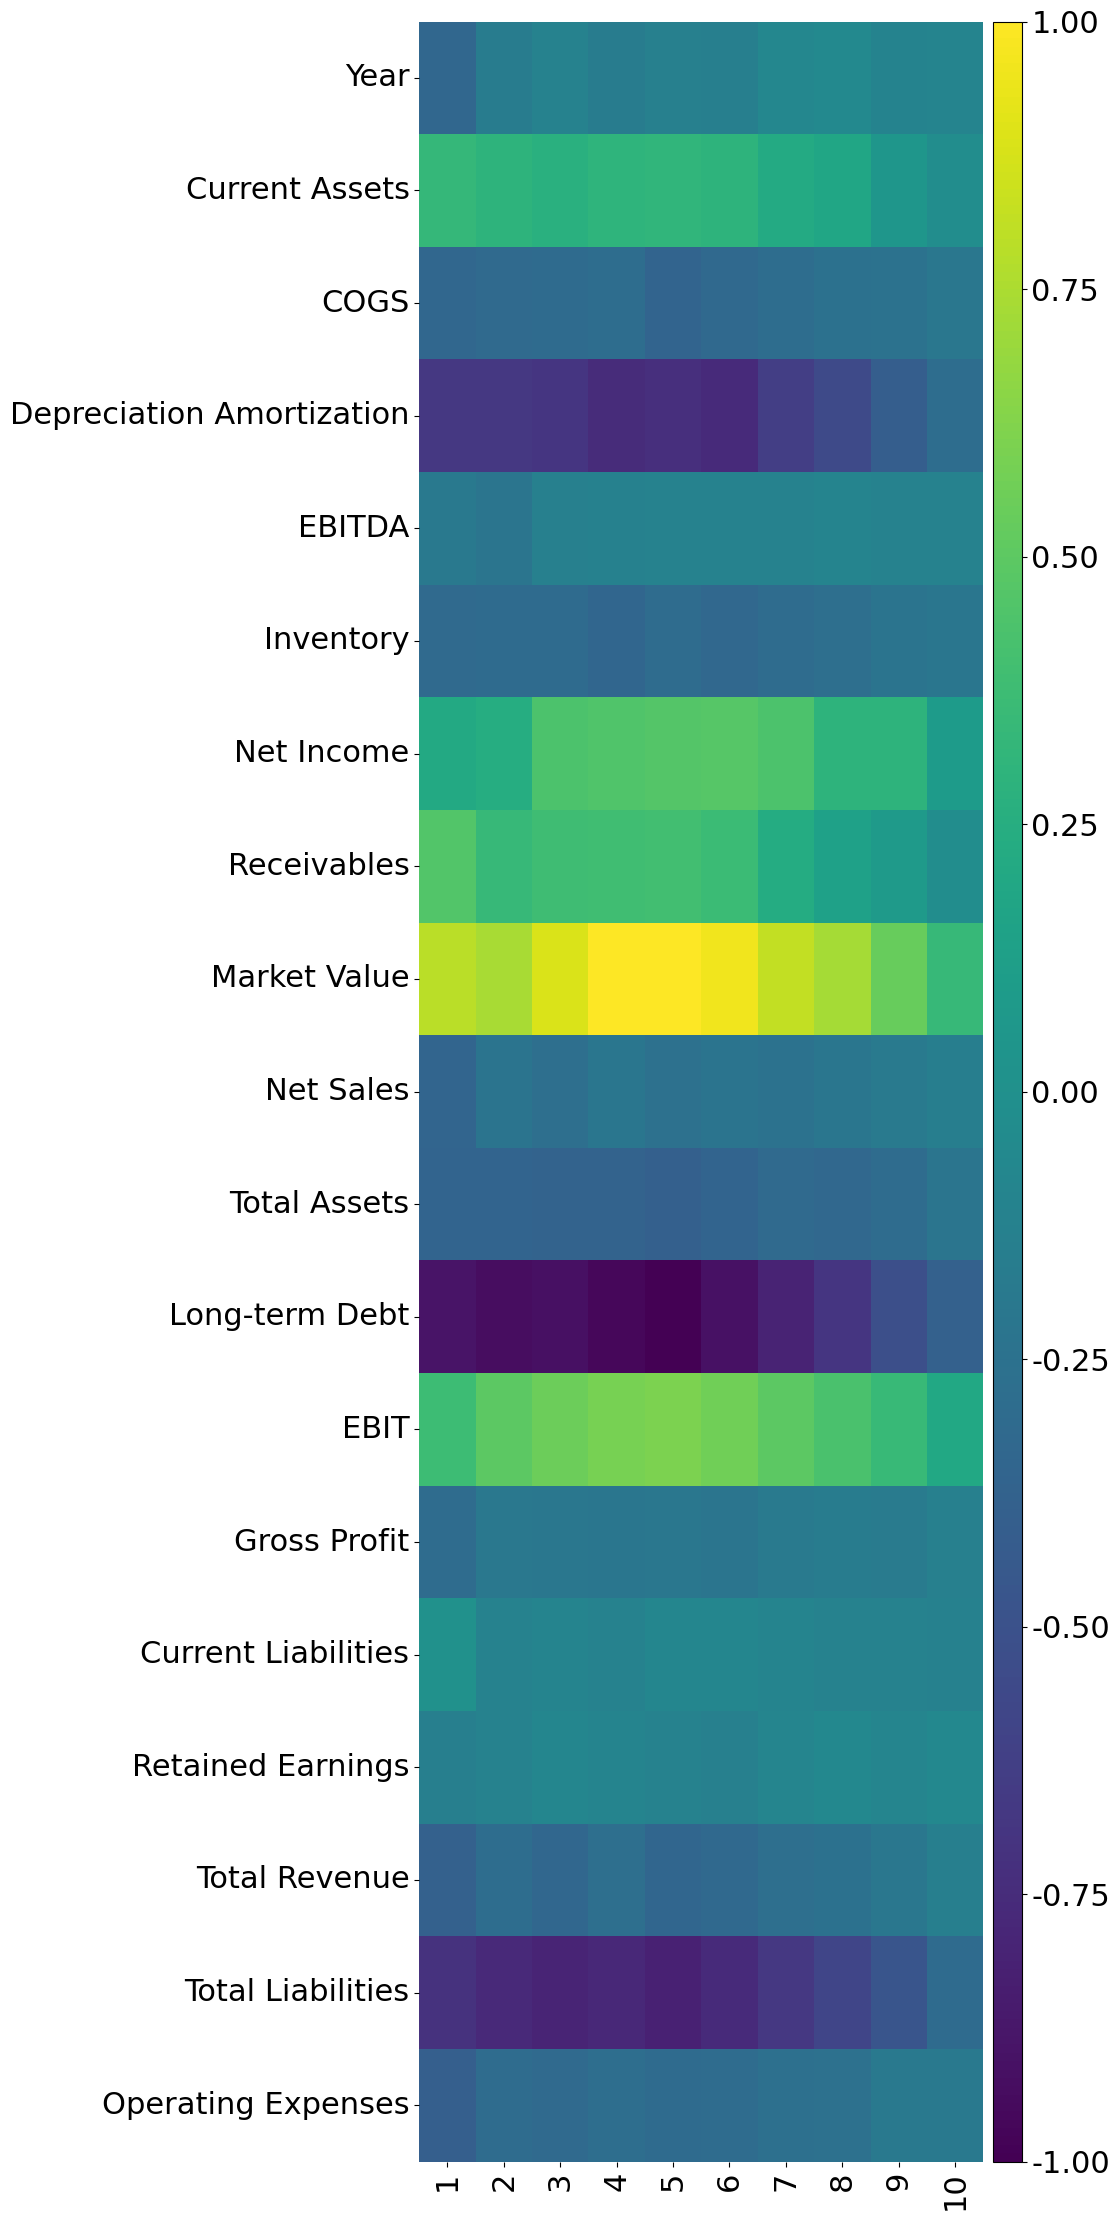

In [10]:
utils_visualizations_IT_SHAP.plot_shap_norm(matrix_pop, 
               matrix_amr, 
               reordered_indices,
               final_order,
               f"../Figures/POST-HOC/SHAP_{split}_mdr_lstm.pdf", 
               time,
               save_img=True
) 

## ALIVE ENTERPRISES (NO BANKRUPTCY)

In [11]:
split_shap_noamr = []

list_of_dfs = copy.deepcopy(split_shap)
array_pacientes = y_test_f

for i in range(len(list_of_dfs)):
    patient_shap = list_of_dfs[i]
    amr_status = array_pacientes[i]  

    for col in patient_shap.columns:
        if amr_status[col - 1] == 1: #bankruptcy patients are set to Nan
            patient_shap.loc[:, col] = np.nan
        else:
            patient_shap.loc[:, col] = patient_shap.loc[:, col] #Nonbankruptcy patients keep the info

    split_shap_noamr.append(patient_shap)

**Visualize the Non BANKRUPTCY data without normalization**

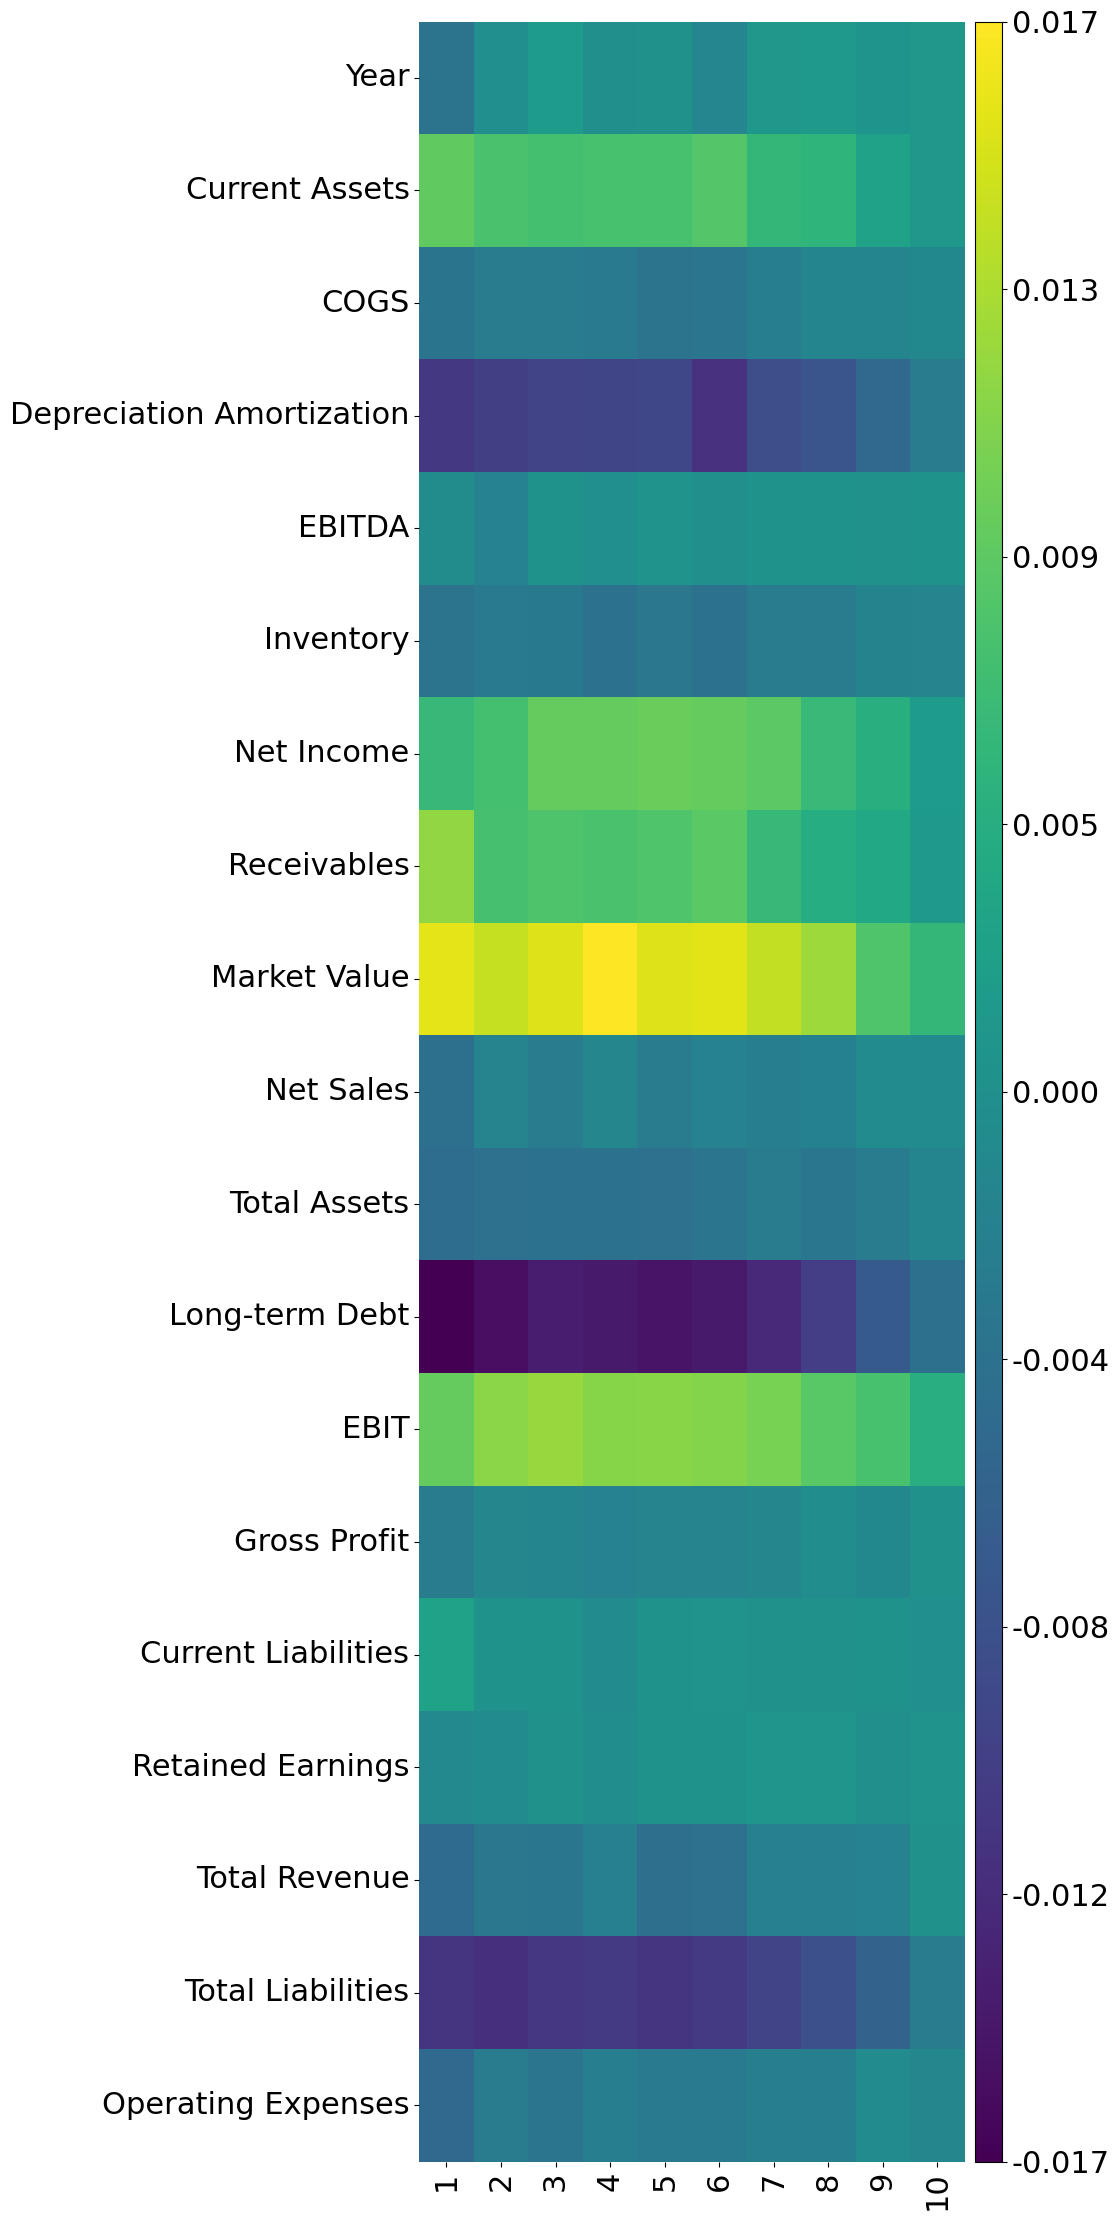

In [12]:
matrix_noamr = utils_visualizations_IT_SHAP.plot_shap(split_shap_noamr, features, reordered_indices, final_order,
                                                      f" ", time, save_img=False)

**Visualize the Non BANKRUPTCY data with normalization**

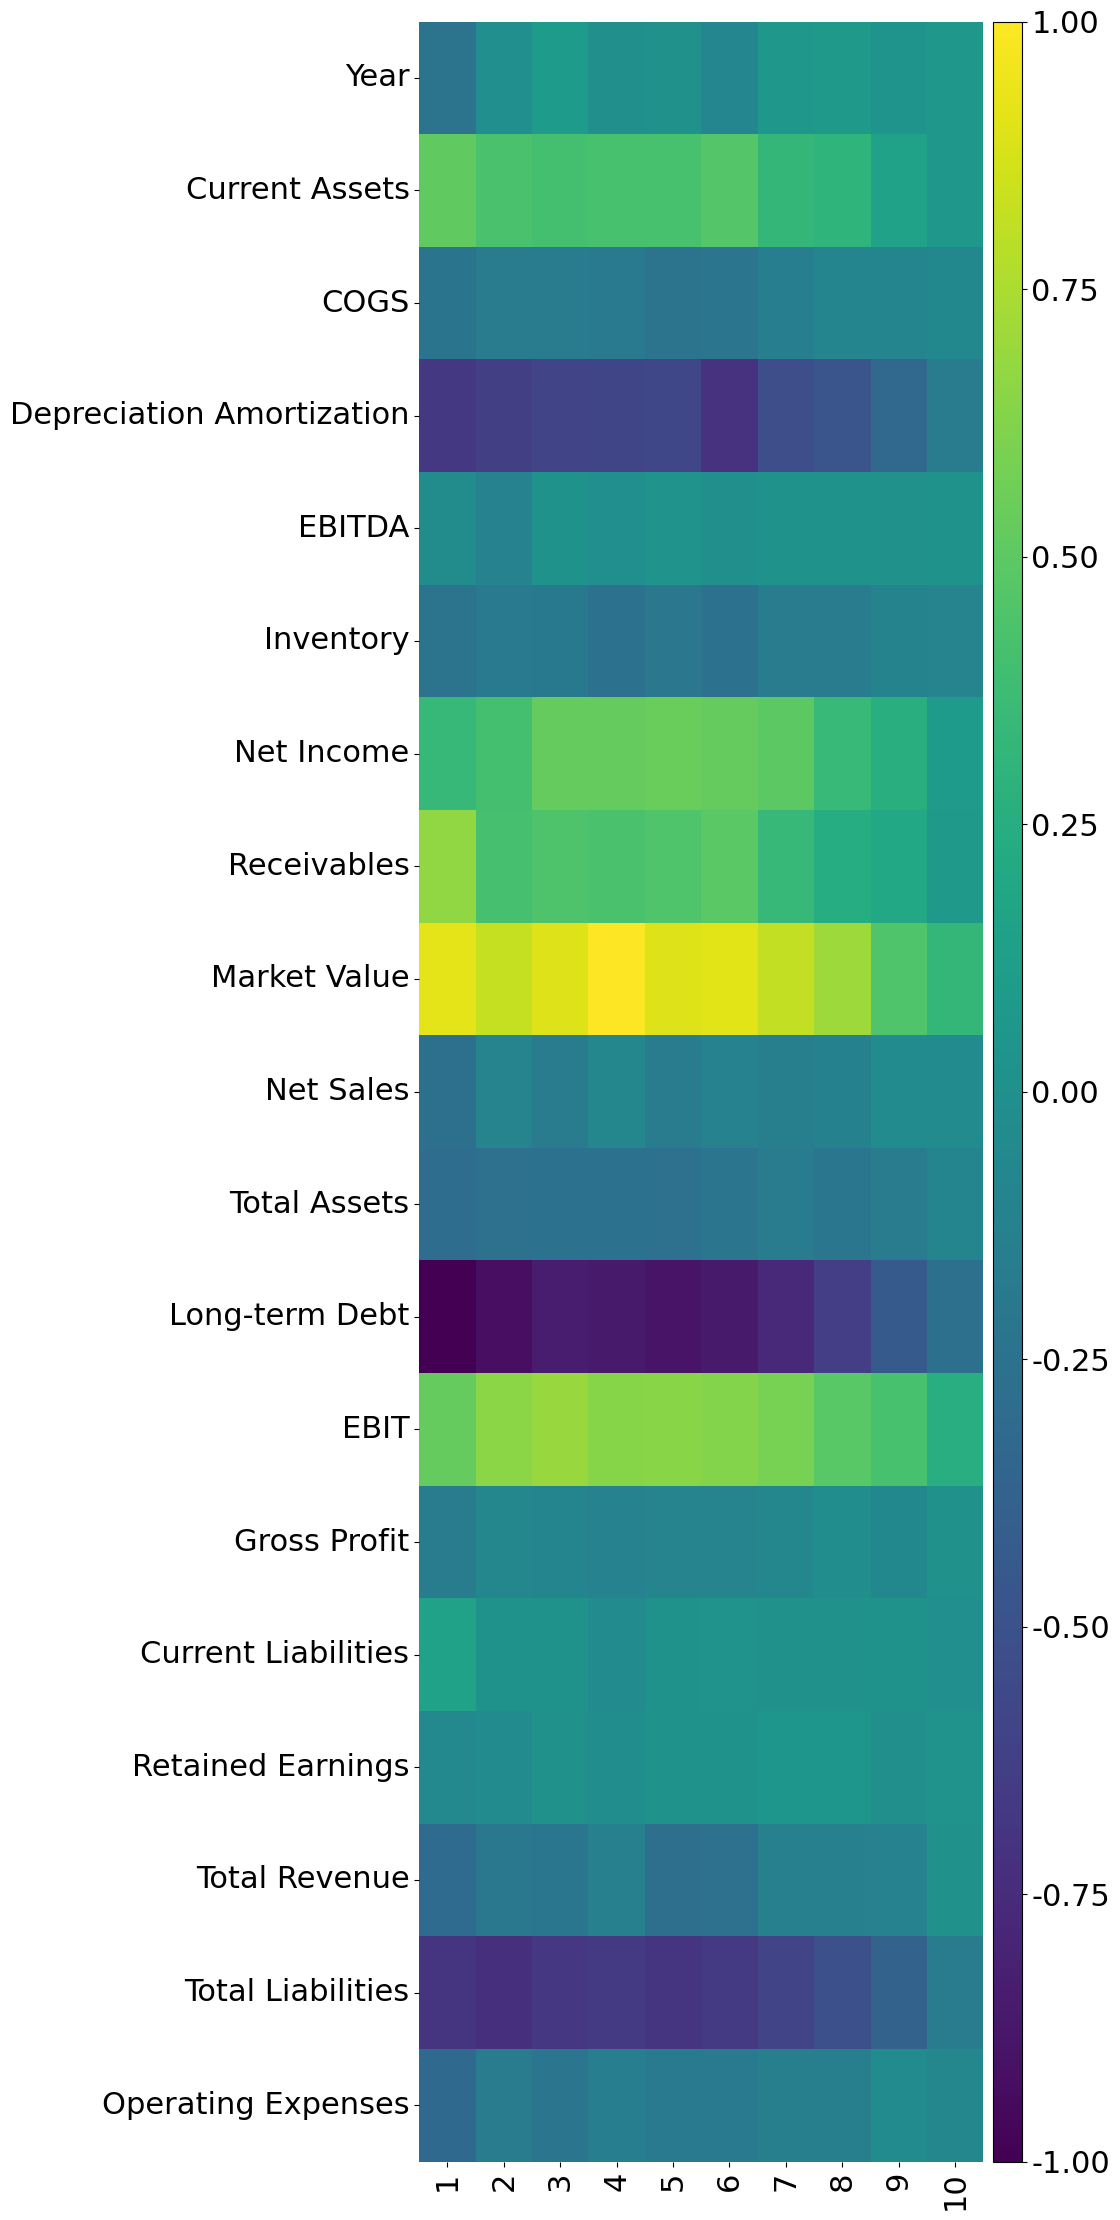

In [13]:
utils_visualizations_IT_SHAP.plot_shap_norm(matrix_pop, 
               matrix_noamr, 
               reordered_indices, 
               final_order,
               f"../Figures/POST-HOC/SHAP_{split}_nomdr_lstm.pdf", 
               time,
               save_img=True
) 

# SPLIT 2

In [14]:
directory = './Results_LSTM'
split = "s2"
norm = "robustNorm"

### POPULATION

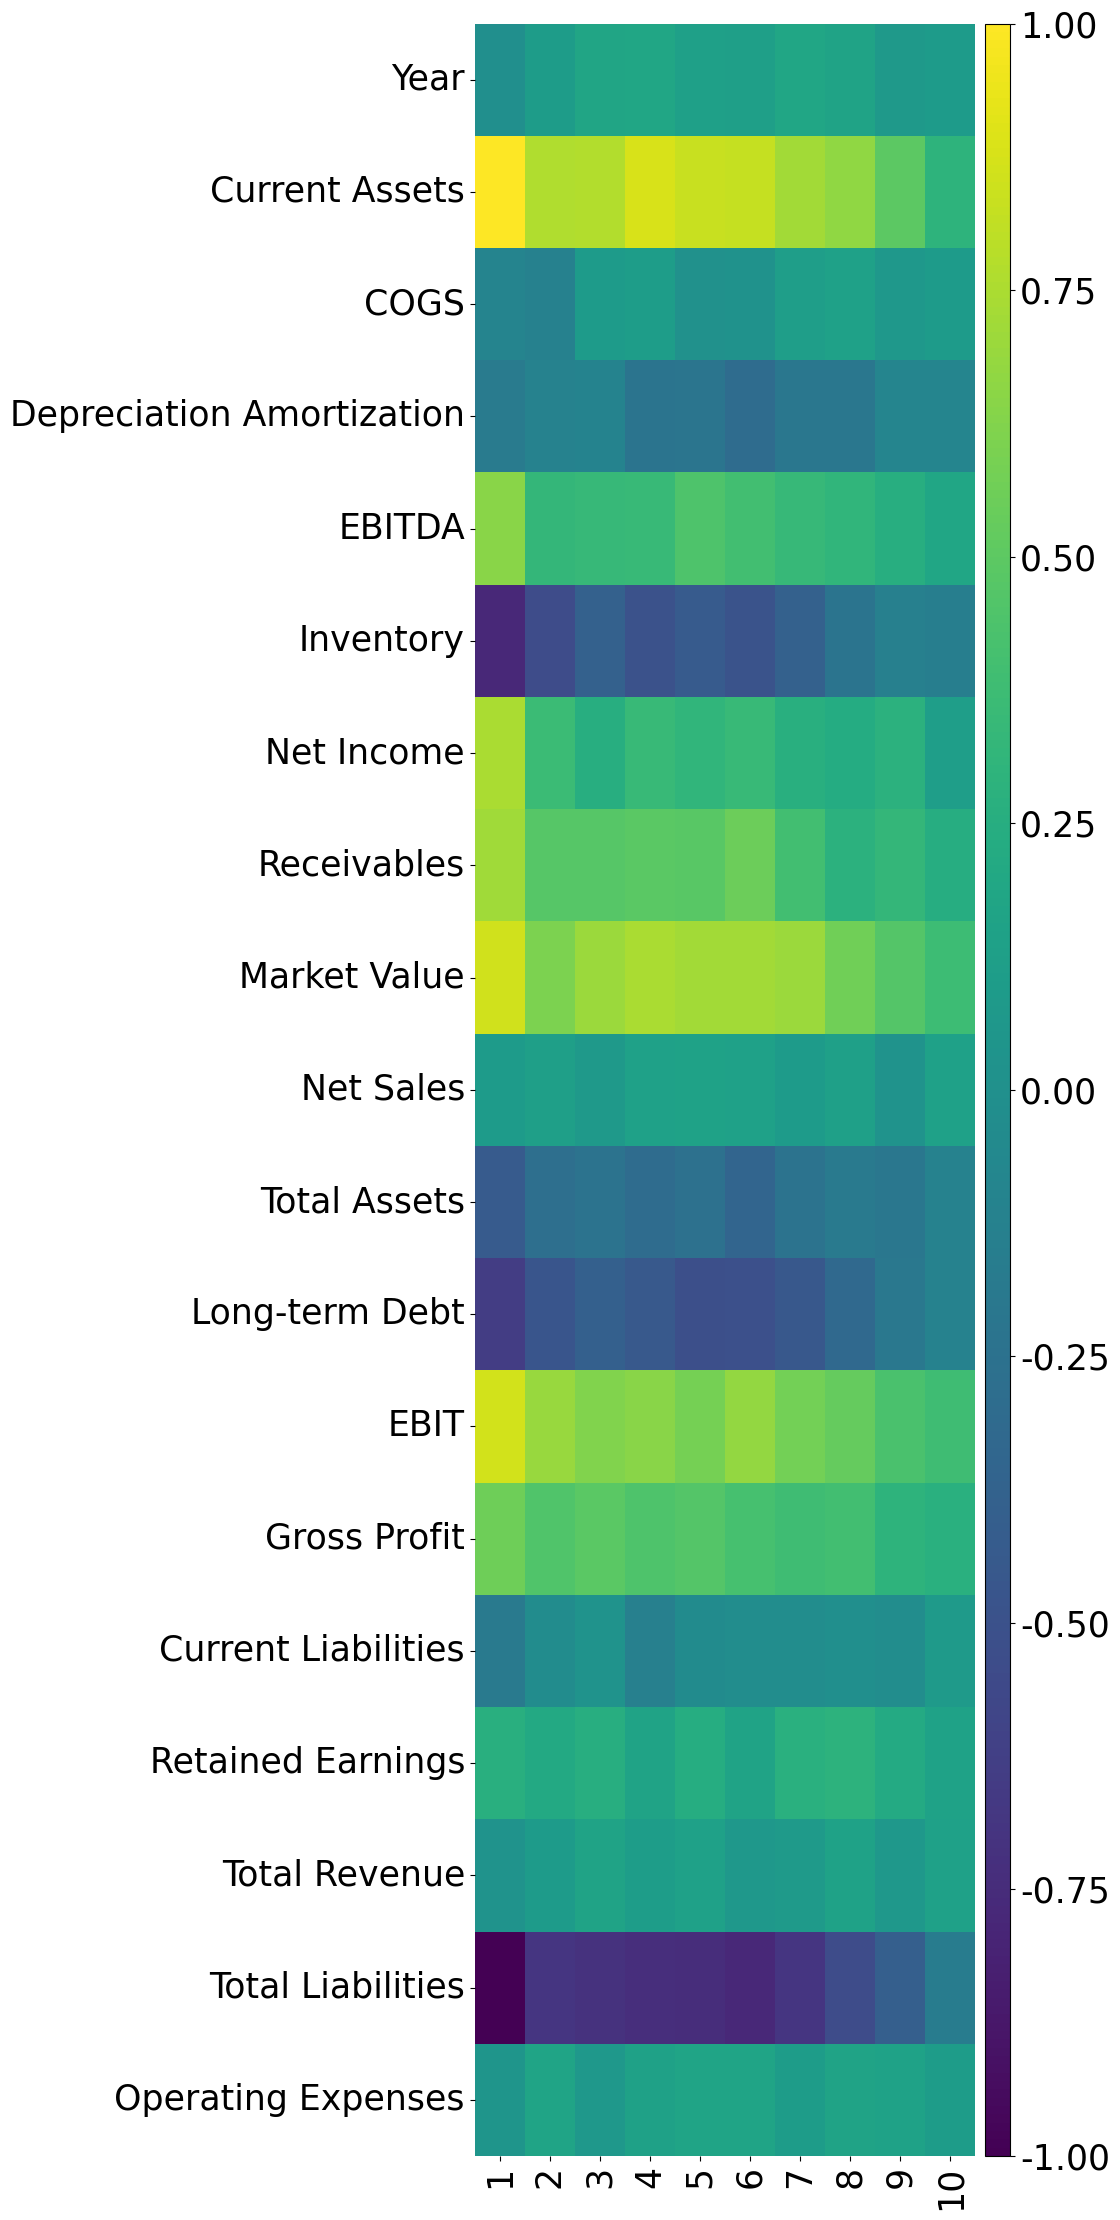

In [15]:
split_shap = utils_visualizations_IT_SHAP.load_from_pickle(os.path.join(directory, f"results_shap_{split}.pkl"))
matrix_pop = utils_visualizations_IT_SHAP.plot_shap_normalized(split_shap, features, reordered_indices, final_order,
                                                    f"../Figures/POST-HOC/SHAP_{split}_population_lstm.pdf", time, save_img=True)

### BANKRUPTCY ENTERPRISES

In [16]:
ign_pat = []
X_test = np.load(f"../../../DATA/BANK/{split}/X_test_tensor_{norm}.npy")
for idx_pat in range(X_test.shape[0]):
    X = X_test[idx_pat]
    rows_filtered = np.any(X == 666, axis=-1)
    if len(rows_filtered[rows_filtered == False]) == 1:
        ign_pat.append(idx_pat)
        
y_test = pd.read_csv(f"../../../DATA/BANK/{split}/y_test_tensor_{norm}.csv")
y_test_f = y_test.loc[:, 'individualMRGerm'].values.reshape(y_test.shape[0] // time, time)
y_test_f = np.delete(y_test_f, ign_pat, axis=0)
y_test_f.shape

(1762, 10)

In [17]:
import copy

list_of_dfs = copy.deepcopy(split_shap)
array_pacientes = y_test_f

split_shap_amr = []

for i in range(len(list_of_dfs)):
    patient_shap = list_of_dfs[i]
    amr_status = array_pacientes[i]  

    for col in patient_shap.columns:
        if amr_status[col - 1] == 0:
            patient_shap.loc[:, col] = np.nan #Nonbankruptcy patients are set to Nan
        else:
            patient_shap.loc[:, col] = patient_shap.loc[:, col] #bankruptcy patients keep the info

    split_shap_amr.append(patient_shap)


**Visualize the BANKRUPTCY data without normalization**

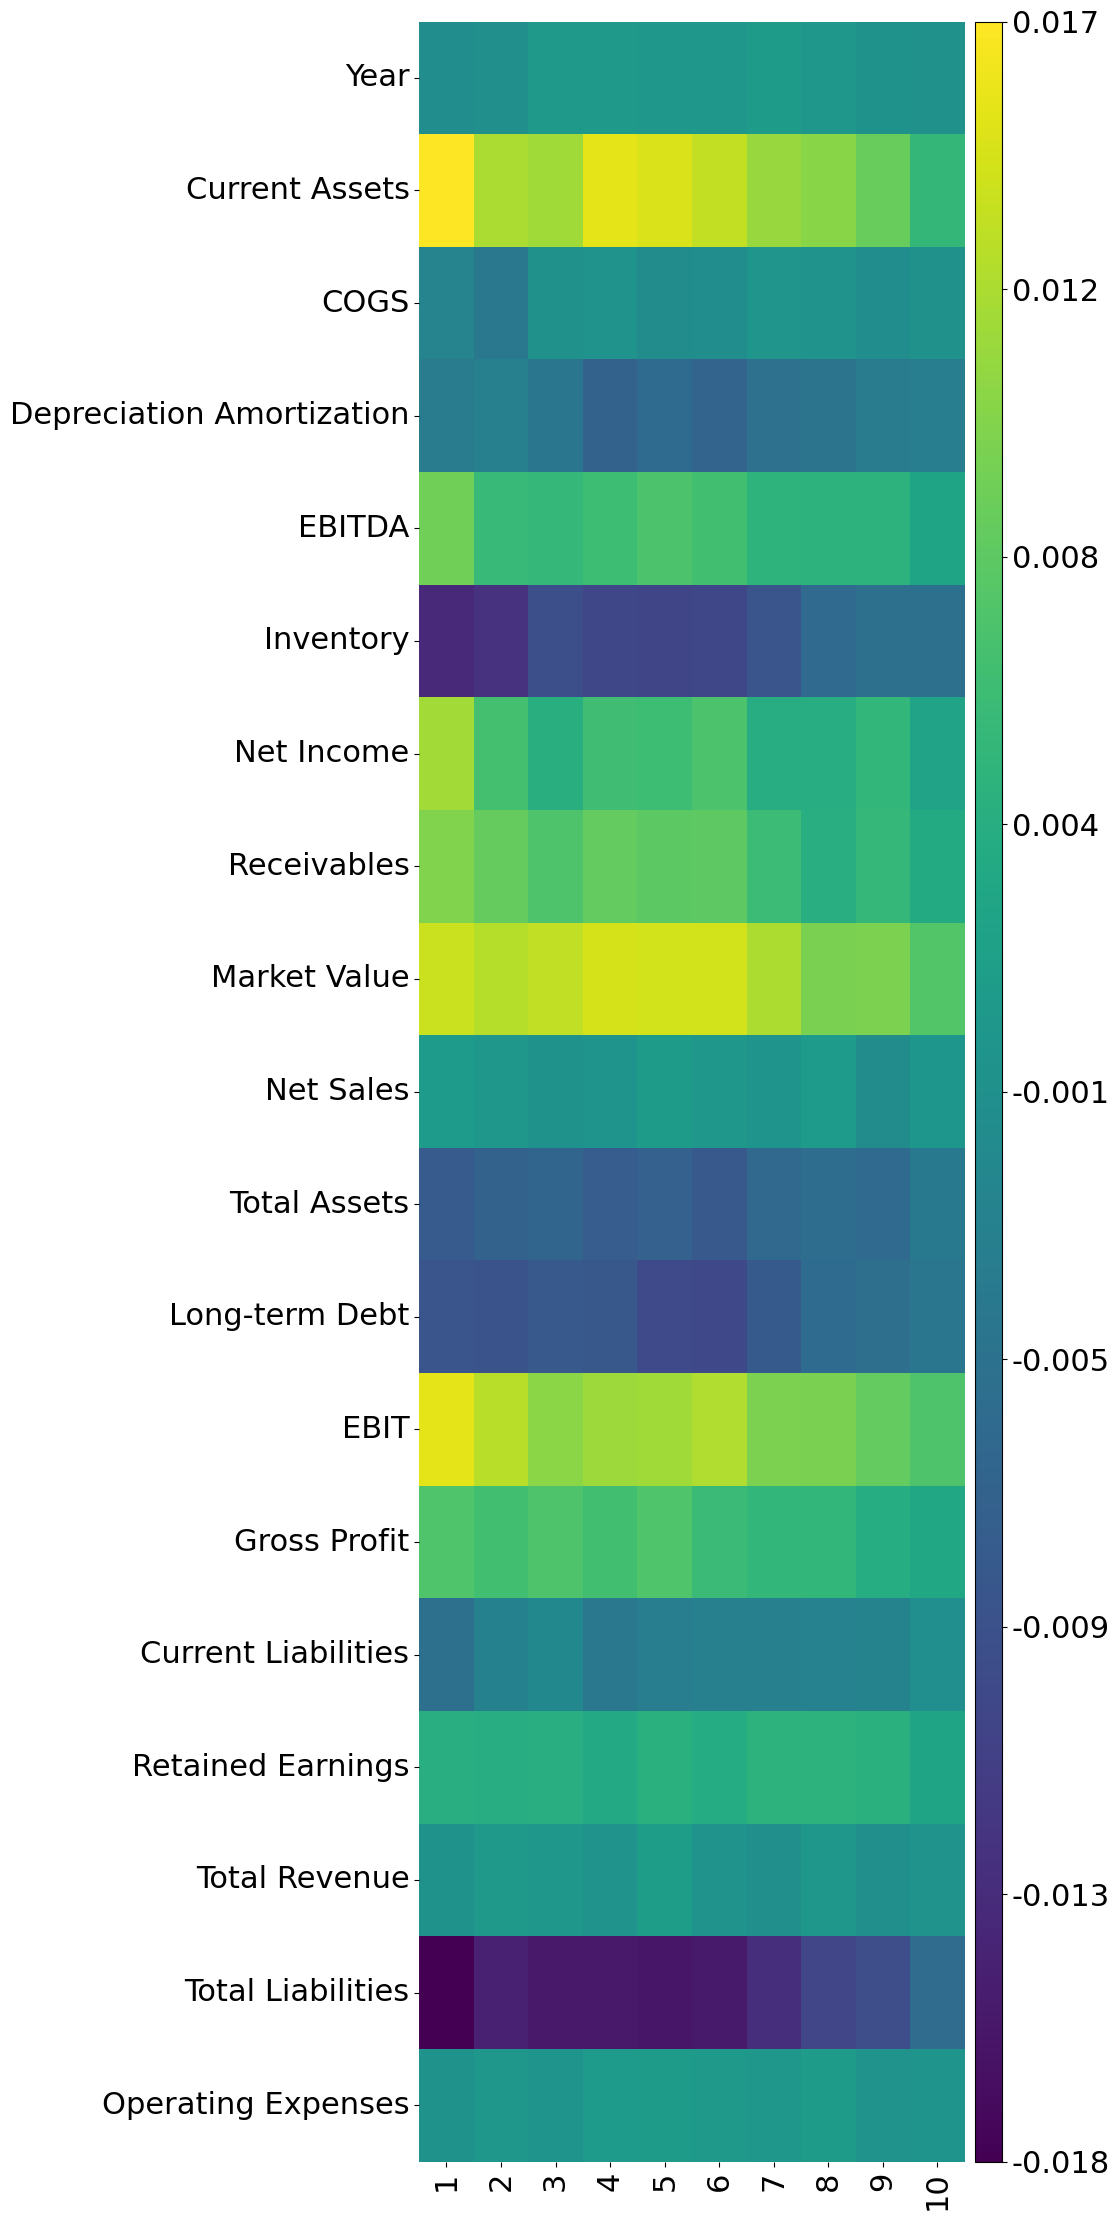

In [18]:
matrix_amr = utils_visualizations_IT_SHAP.plot_shap(split_shap_amr, features, reordered_indices, final_order,
                                                    f"", time, save_img=False)

**Visualize the BANKRUPTCY data with normalization**

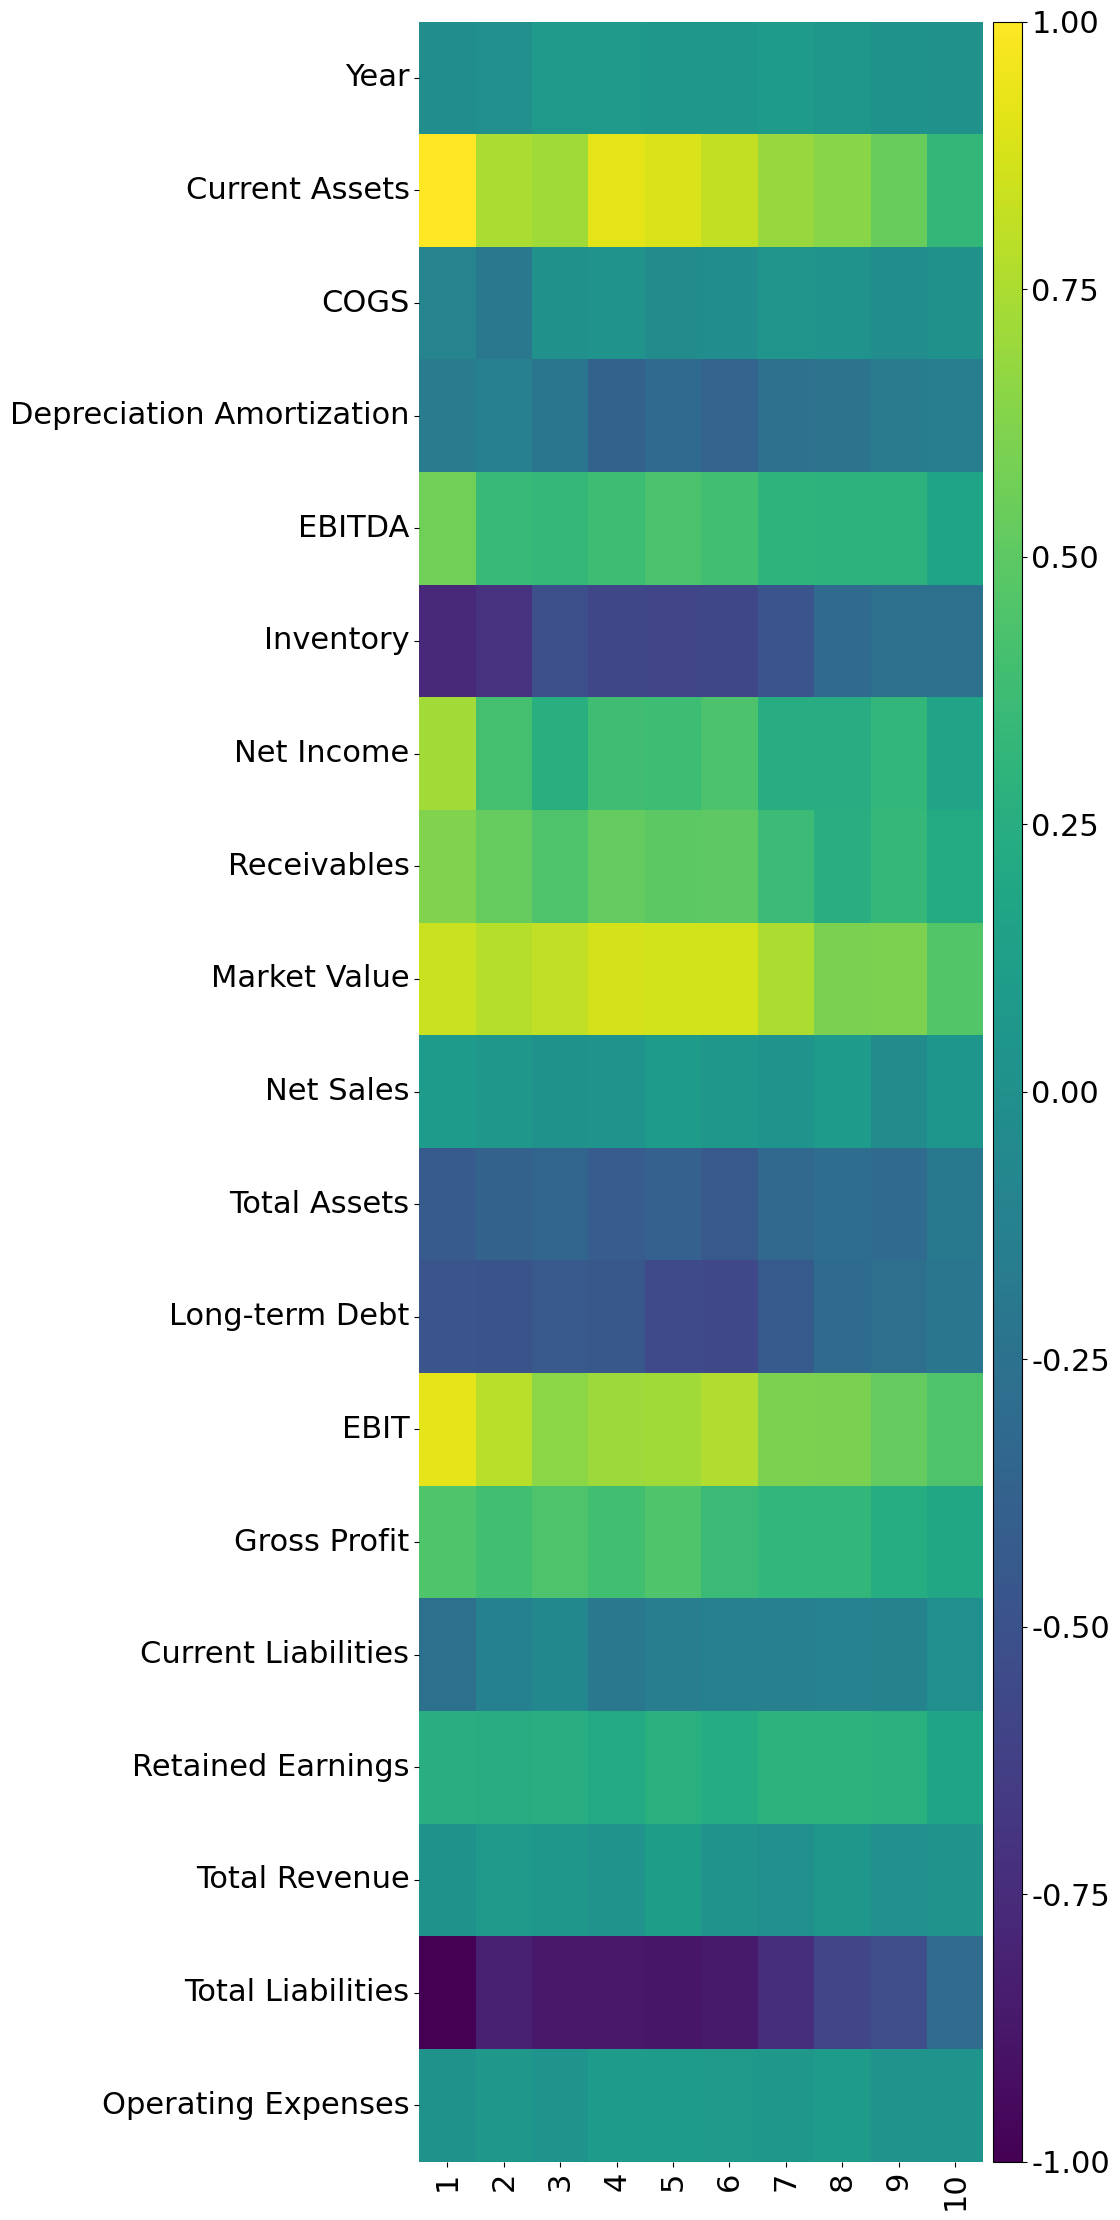

In [19]:
utils_visualizations_IT_SHAP.plot_shap_norm(matrix_pop, 
               matrix_amr, 
               reordered_indices,
               final_order,
               f"../Figures/POST-HOC/SHAP_{split}_mdr_lstm.pdf", 
               time,
               save_img=True
) 

## ALIVE ENTERPRISES (NO BANKRUPTCY)

In [20]:
split_shap_noamr = []

list_of_dfs = copy.deepcopy(split_shap)
array_pacientes = y_test_f

for i in range(len(list_of_dfs)):
    patient_shap = list_of_dfs[i]
    amr_status = array_pacientes[i]  

    for col in patient_shap.columns:
        if amr_status[col - 1] == 1: #bankruptcy patients are set to Nan
            patient_shap.loc[:, col] = np.nan
        else:
            patient_shap.loc[:, col] = patient_shap.loc[:, col] #Nonbankruptcy patients keep the info

    split_shap_noamr.append(patient_shap)

**Visualize the Non BANKRUPTCY data without normalization**

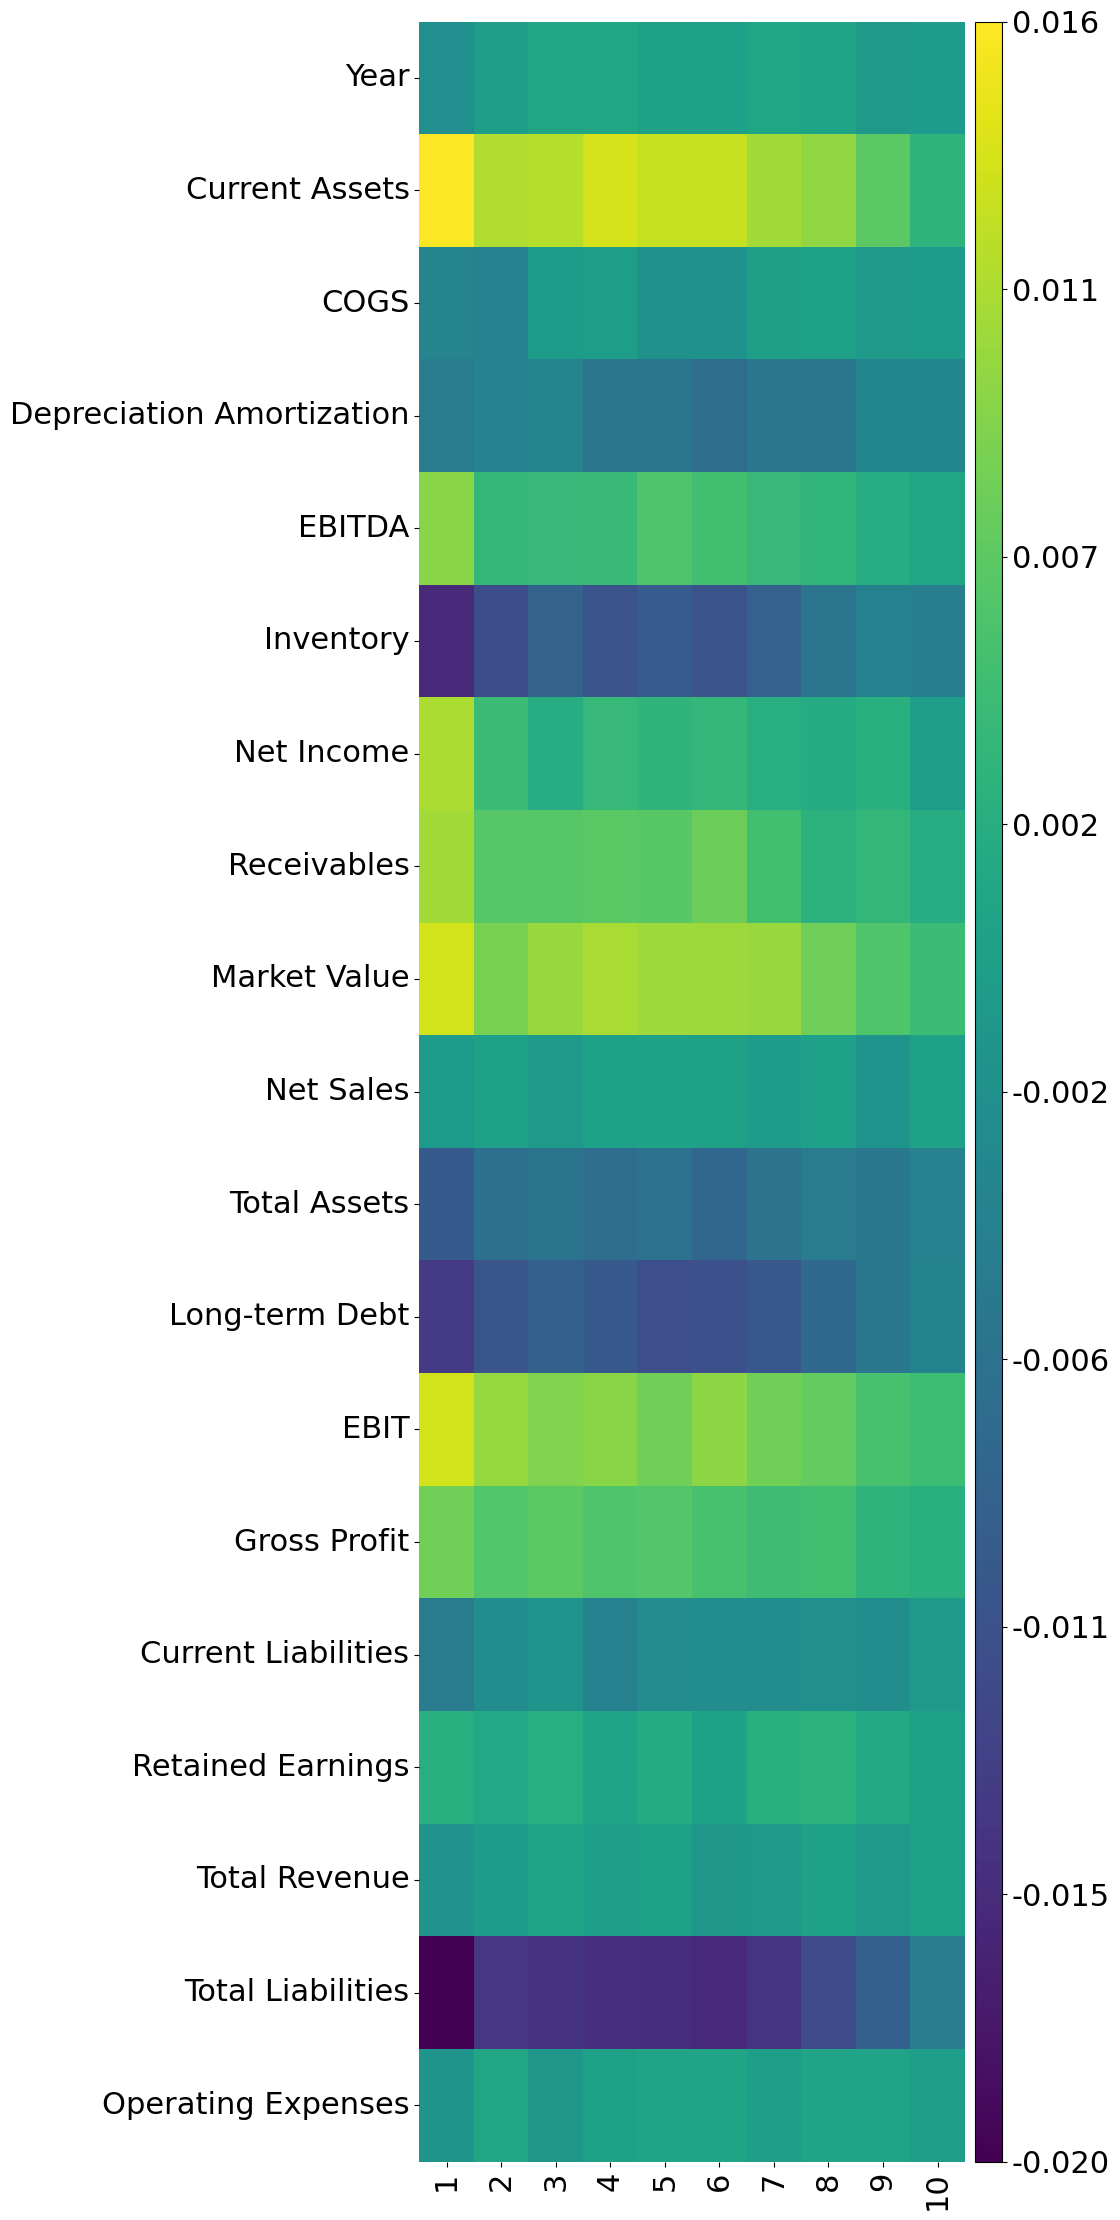

In [21]:
matrix_noamr = utils_visualizations_IT_SHAP.plot_shap(split_shap_noamr, features, reordered_indices, final_order,
                                                      f" ", time, save_img=False)

**Visualize the Non BANKRUPTCY data with normalization**

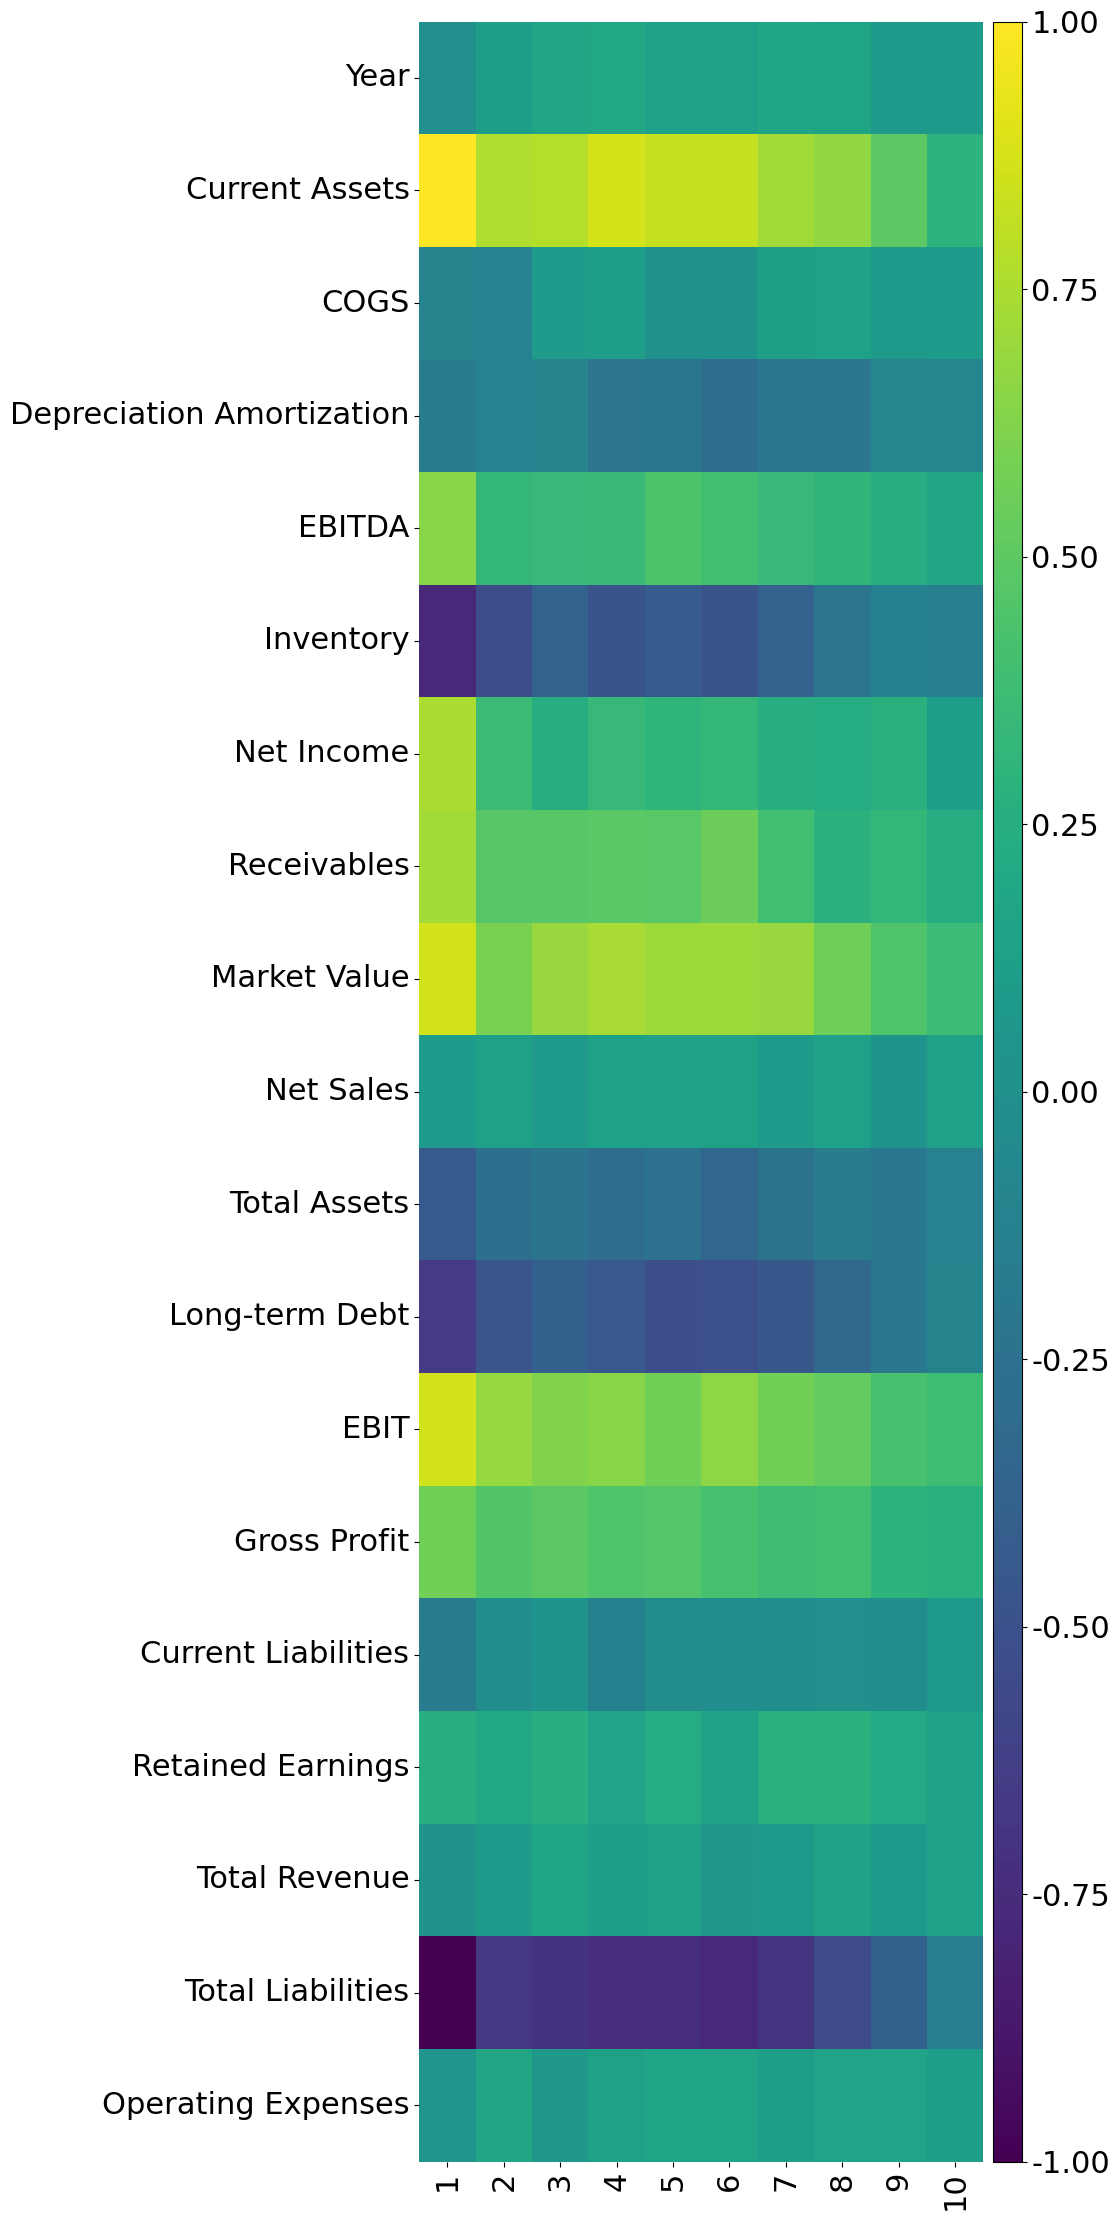

In [22]:
utils_visualizations_IT_SHAP.plot_shap_norm(matrix_pop, 
               matrix_noamr, 
               reordered_indices, 
               final_order,
               f"../Figures/POST-HOC/SHAP_{split}_nomdr_lstm.pdf", 
               time,
               save_img=True
) 

# SPLIT 3

In [23]:
directory = './Results_LSTM'
split = "s3"
norm = "robustNorm"

### POPULATION

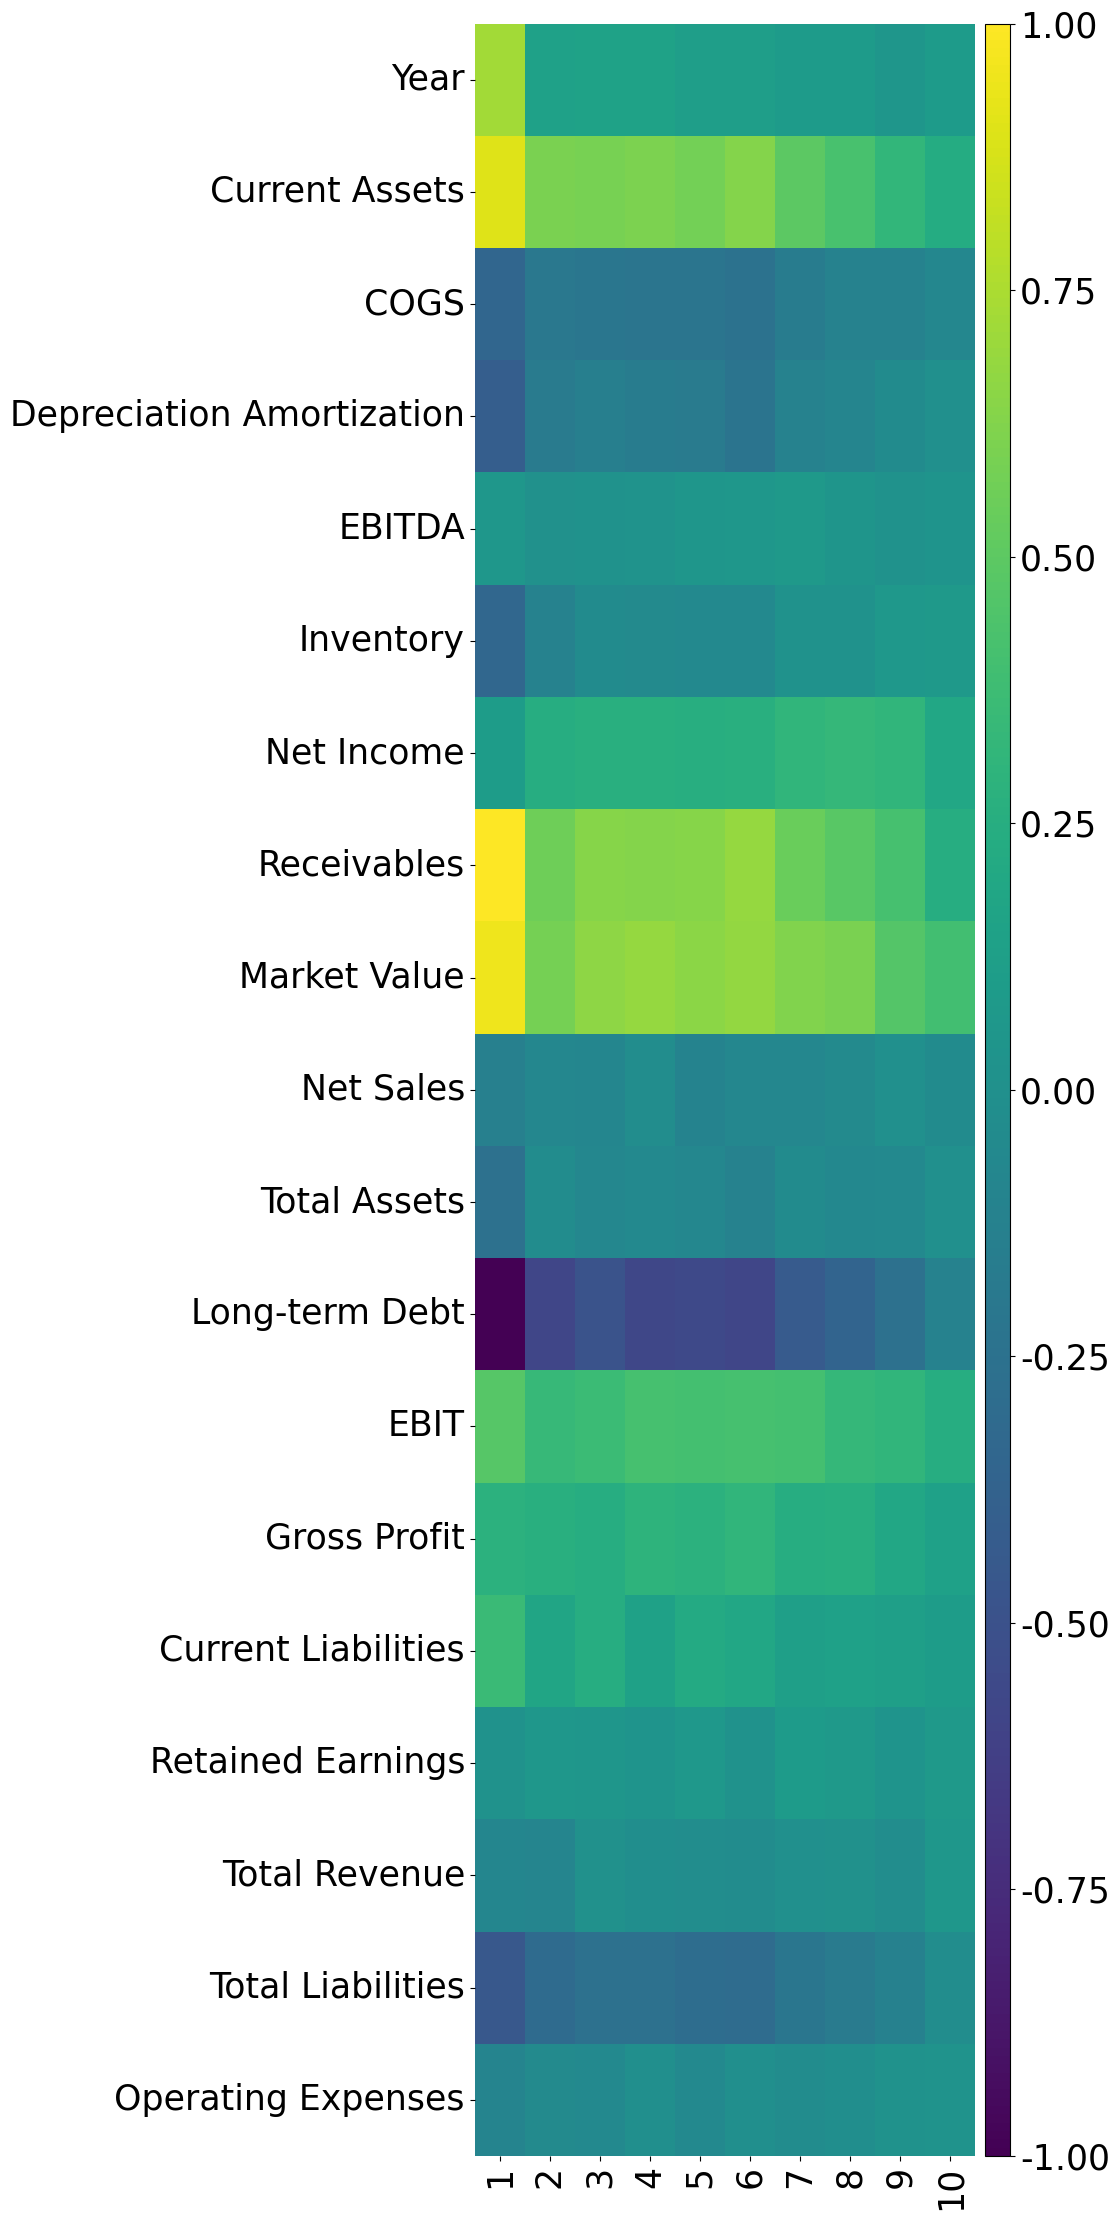

In [24]:
split_shap = utils_visualizations_IT_SHAP.load_from_pickle(os.path.join(directory, f"results_shap_{split}.pkl"))
matrix_pop = utils_visualizations_IT_SHAP.plot_shap_normalized(split_shap, features, reordered_indices, final_order,
                                                    f"../Figures/POST-HOC/SHAP_{split}_population_lstm.pdf", time, save_img=True)

### BANKRUPTCY ENTERPRISES

In [25]:
ign_pat = []
X_test = np.load(f"../../../DATA/BANK/{split}/X_test_tensor_{norm}.npy")
for idx_pat in range(X_test.shape[0]):
    X = X_test[idx_pat]
    rows_filtered = np.any(X == 666, axis=-1)
    if len(rows_filtered[rows_filtered == False]) == 1:
        ign_pat.append(idx_pat)
        
y_test = pd.read_csv(f"../../../DATA/BANK/{split}/y_test_tensor_{norm}.csv")
y_test_f = y_test.loc[:, 'individualMRGerm'].values.reshape(y_test.shape[0] // time, time)
y_test_f = np.delete(y_test_f, ign_pat, axis=0)
y_test_f.shape

(1762, 10)

In [26]:
import copy

list_of_dfs = copy.deepcopy(split_shap)
array_pacientes = y_test_f

split_shap_amr = []

for i in range(len(list_of_dfs)):
    patient_shap = list_of_dfs[i]
    amr_status = array_pacientes[i]  

    for col in patient_shap.columns:
        if amr_status[col - 1] == 0:
            patient_shap.loc[:, col] = np.nan #Nonbankruptcy patients are set to Nan
        else:
            patient_shap.loc[:, col] = patient_shap.loc[:, col] #bankruptcy patients keep the info

    split_shap_amr.append(patient_shap)


**Visualize the BANKRUPTCY data without normalization**

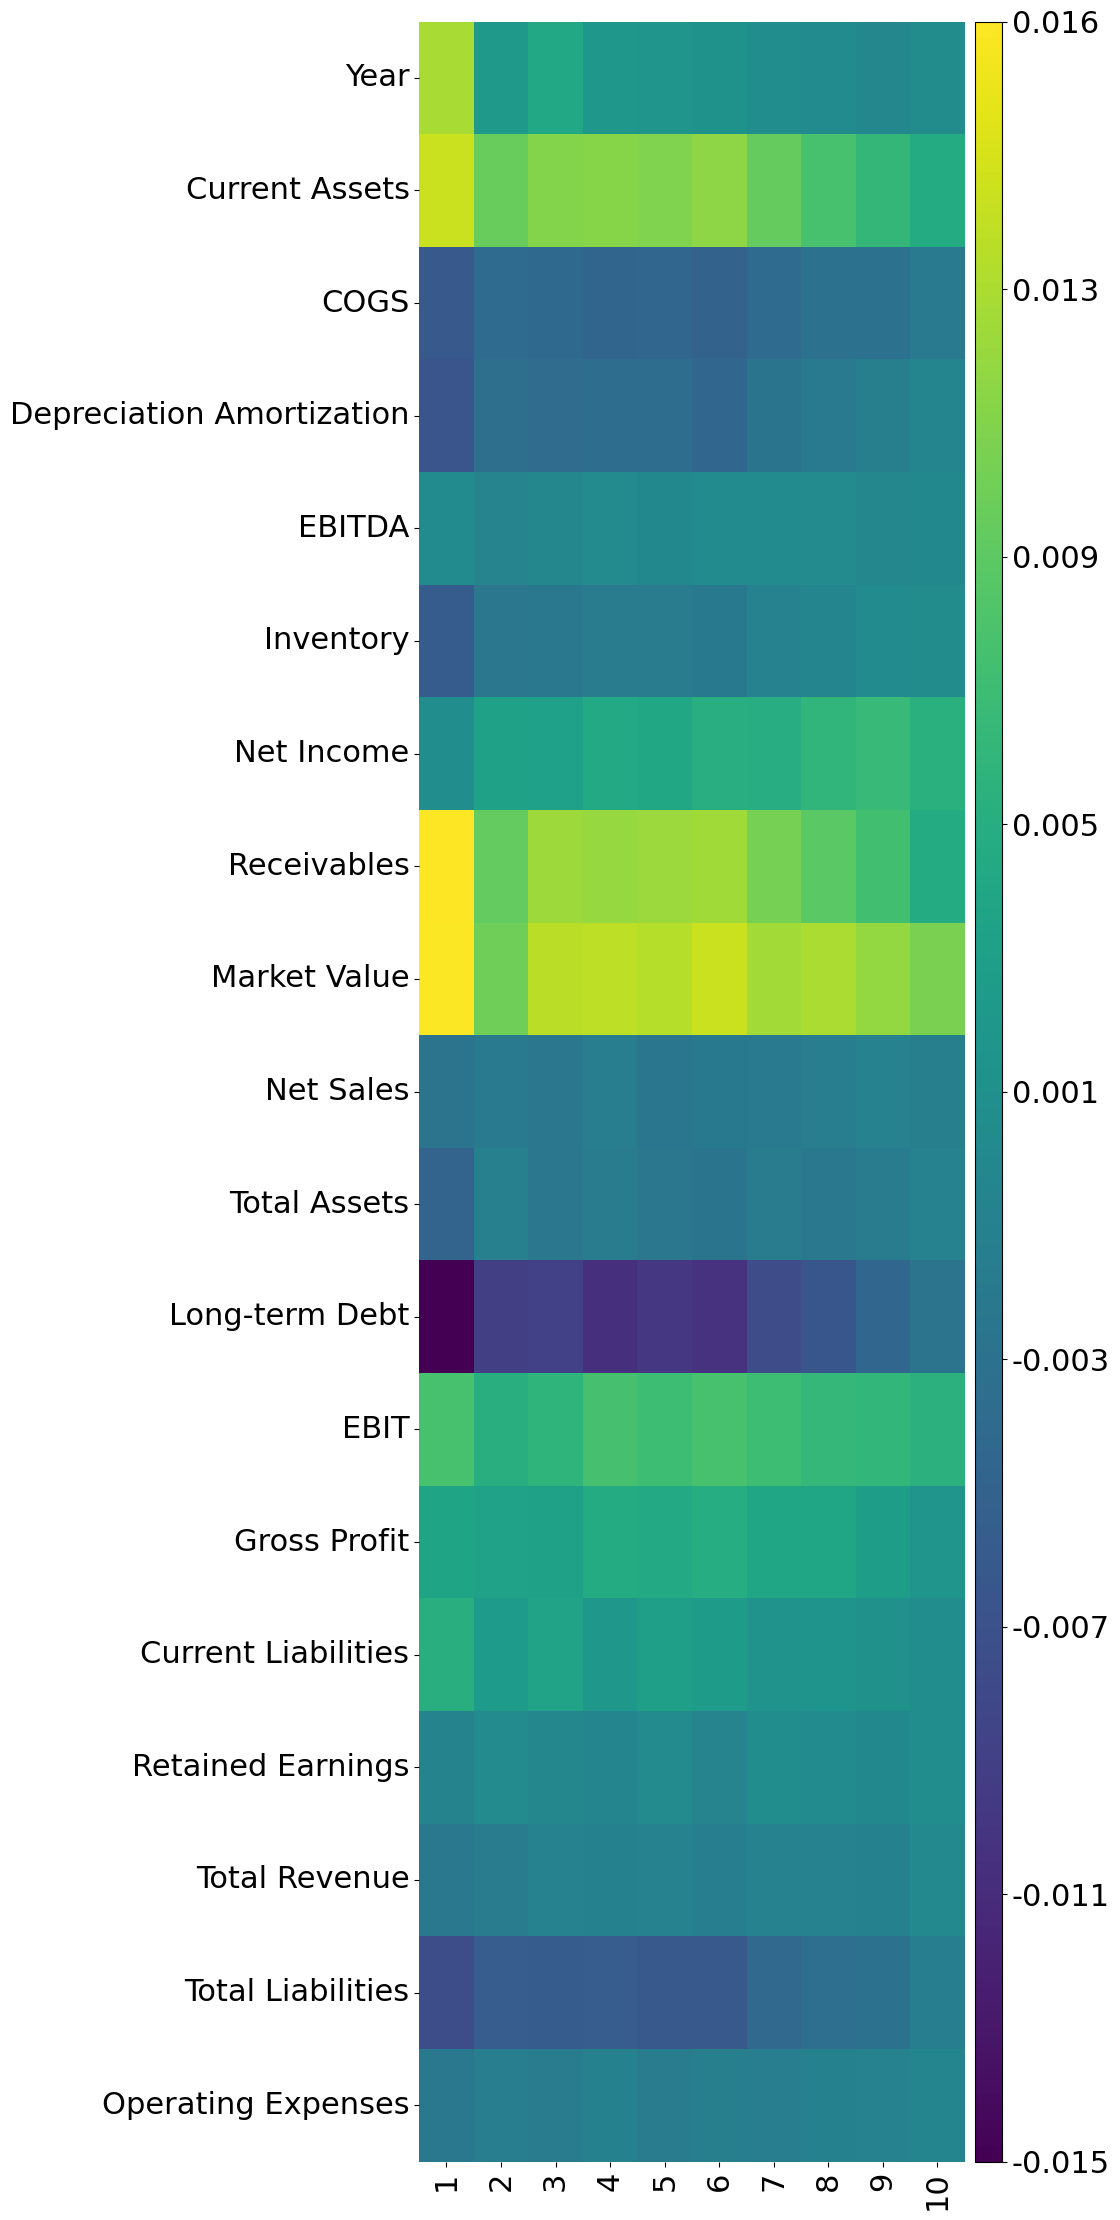

In [27]:
matrix_amr = utils_visualizations_IT_SHAP.plot_shap(split_shap_amr, features, reordered_indices, final_order,
                                                    f"", time, save_img=False)

**Visualize the BANKRUPTCY data with normalization**

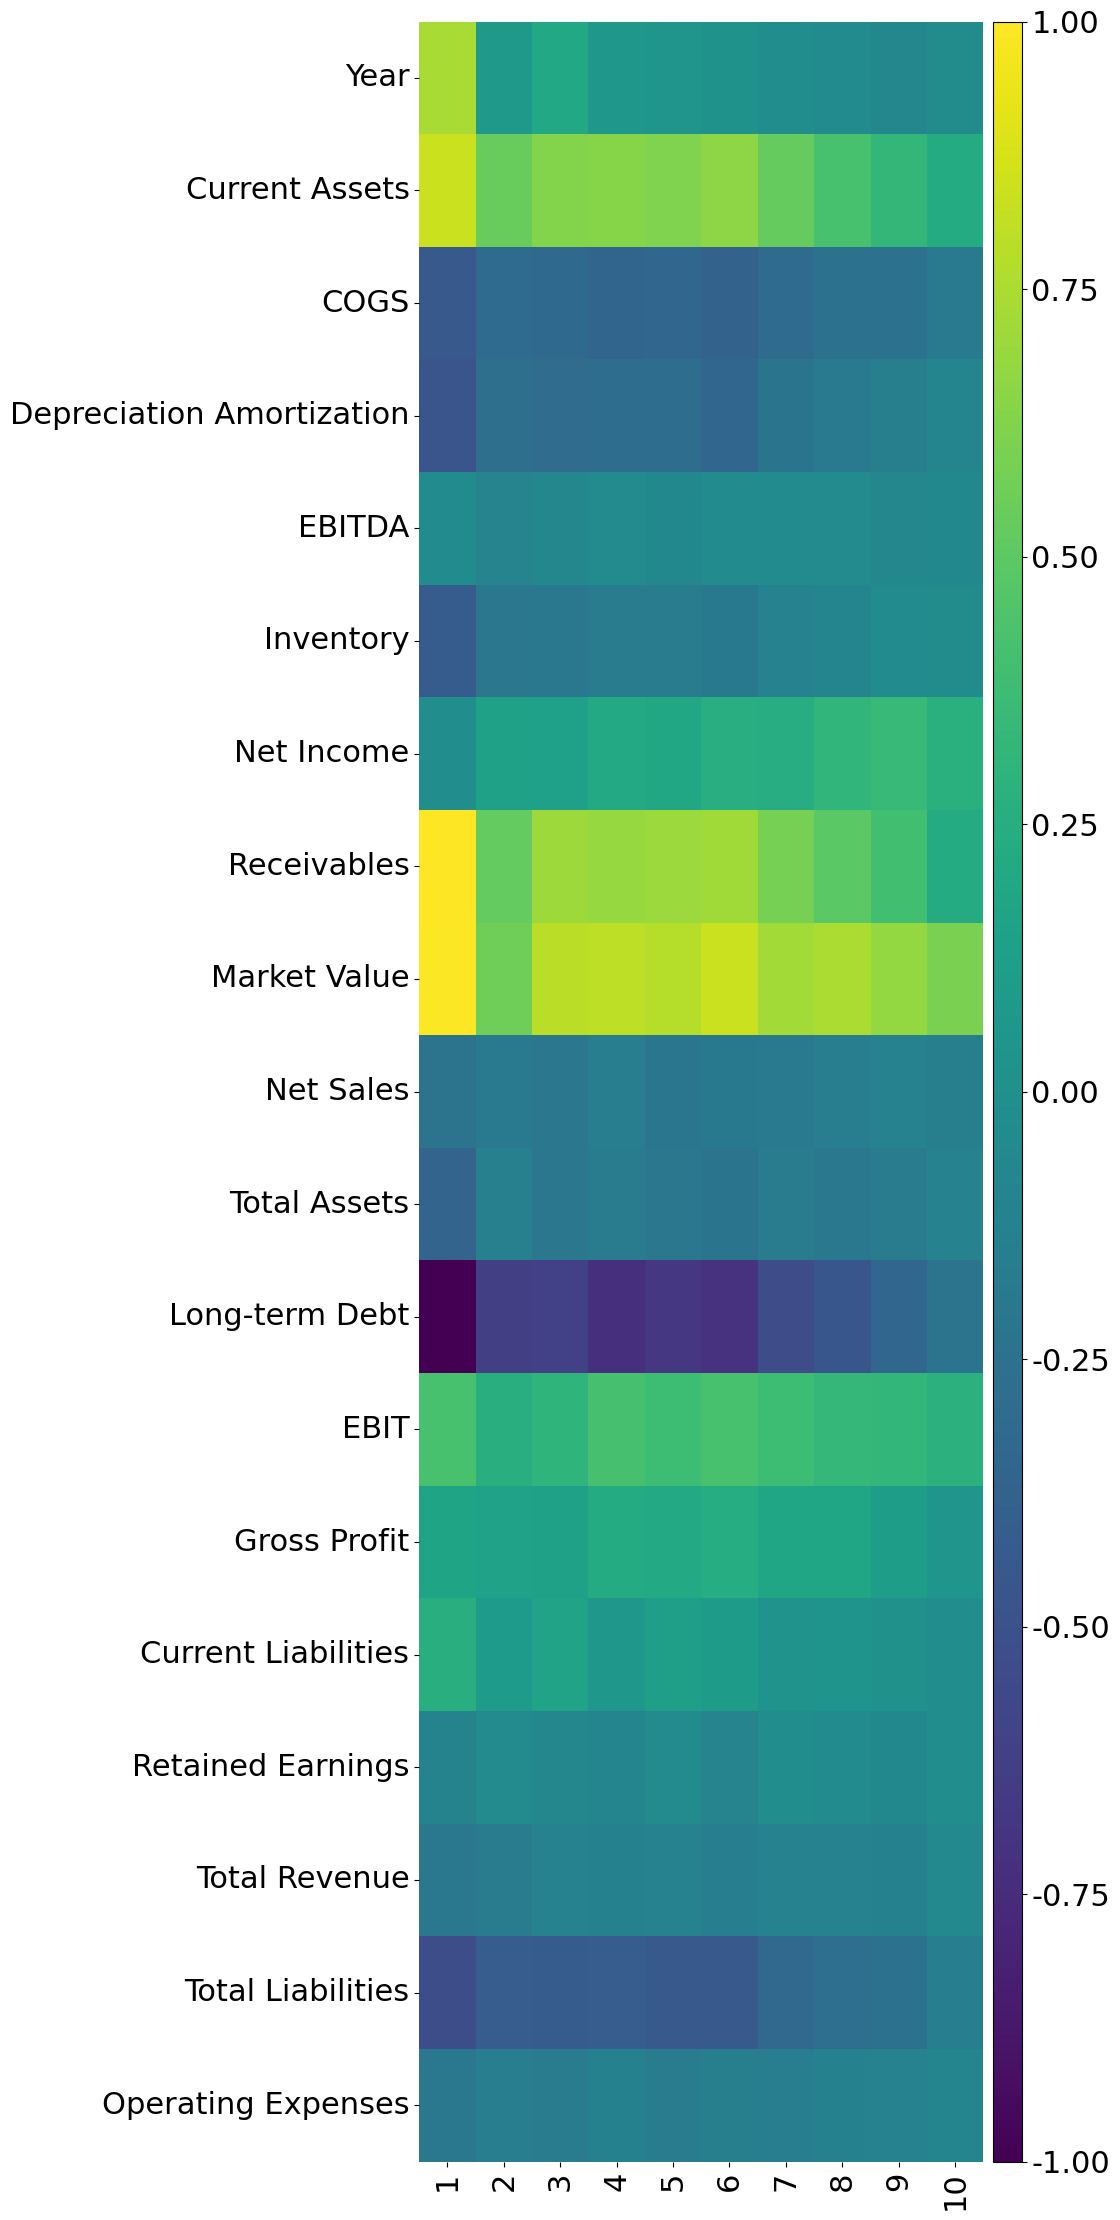

In [28]:
utils_visualizations_IT_SHAP.plot_shap_norm(matrix_pop, 
               matrix_amr, 
               reordered_indices, 
               final_order,
               f"../Figures/POST-HOC/SHAP_{split}_mdr_lstm.pdf",
               time,
               save_img=True
) 

## ALIVE ENTERPRISES (NO BANKRUPTCY)

In [29]:
split_shap_noamr = []

list_of_dfs = copy.deepcopy(split_shap)
array_pacientes = y_test_f

for i in range(len(list_of_dfs)):
    patient_shap = list_of_dfs[i]
    amr_status = array_pacientes[i]  

    for col in patient_shap.columns:
        if amr_status[col - 1] == 1: #bankruptcy patients are set to Nan
            patient_shap.loc[:, col] = np.nan
        else:
            patient_shap.loc[:, col] = patient_shap.loc[:, col] #Nonbankruptcy patients keep the info

    split_shap_noamr.append(patient_shap)

**Visualize the Non BANKRUPTCY data without normalization**

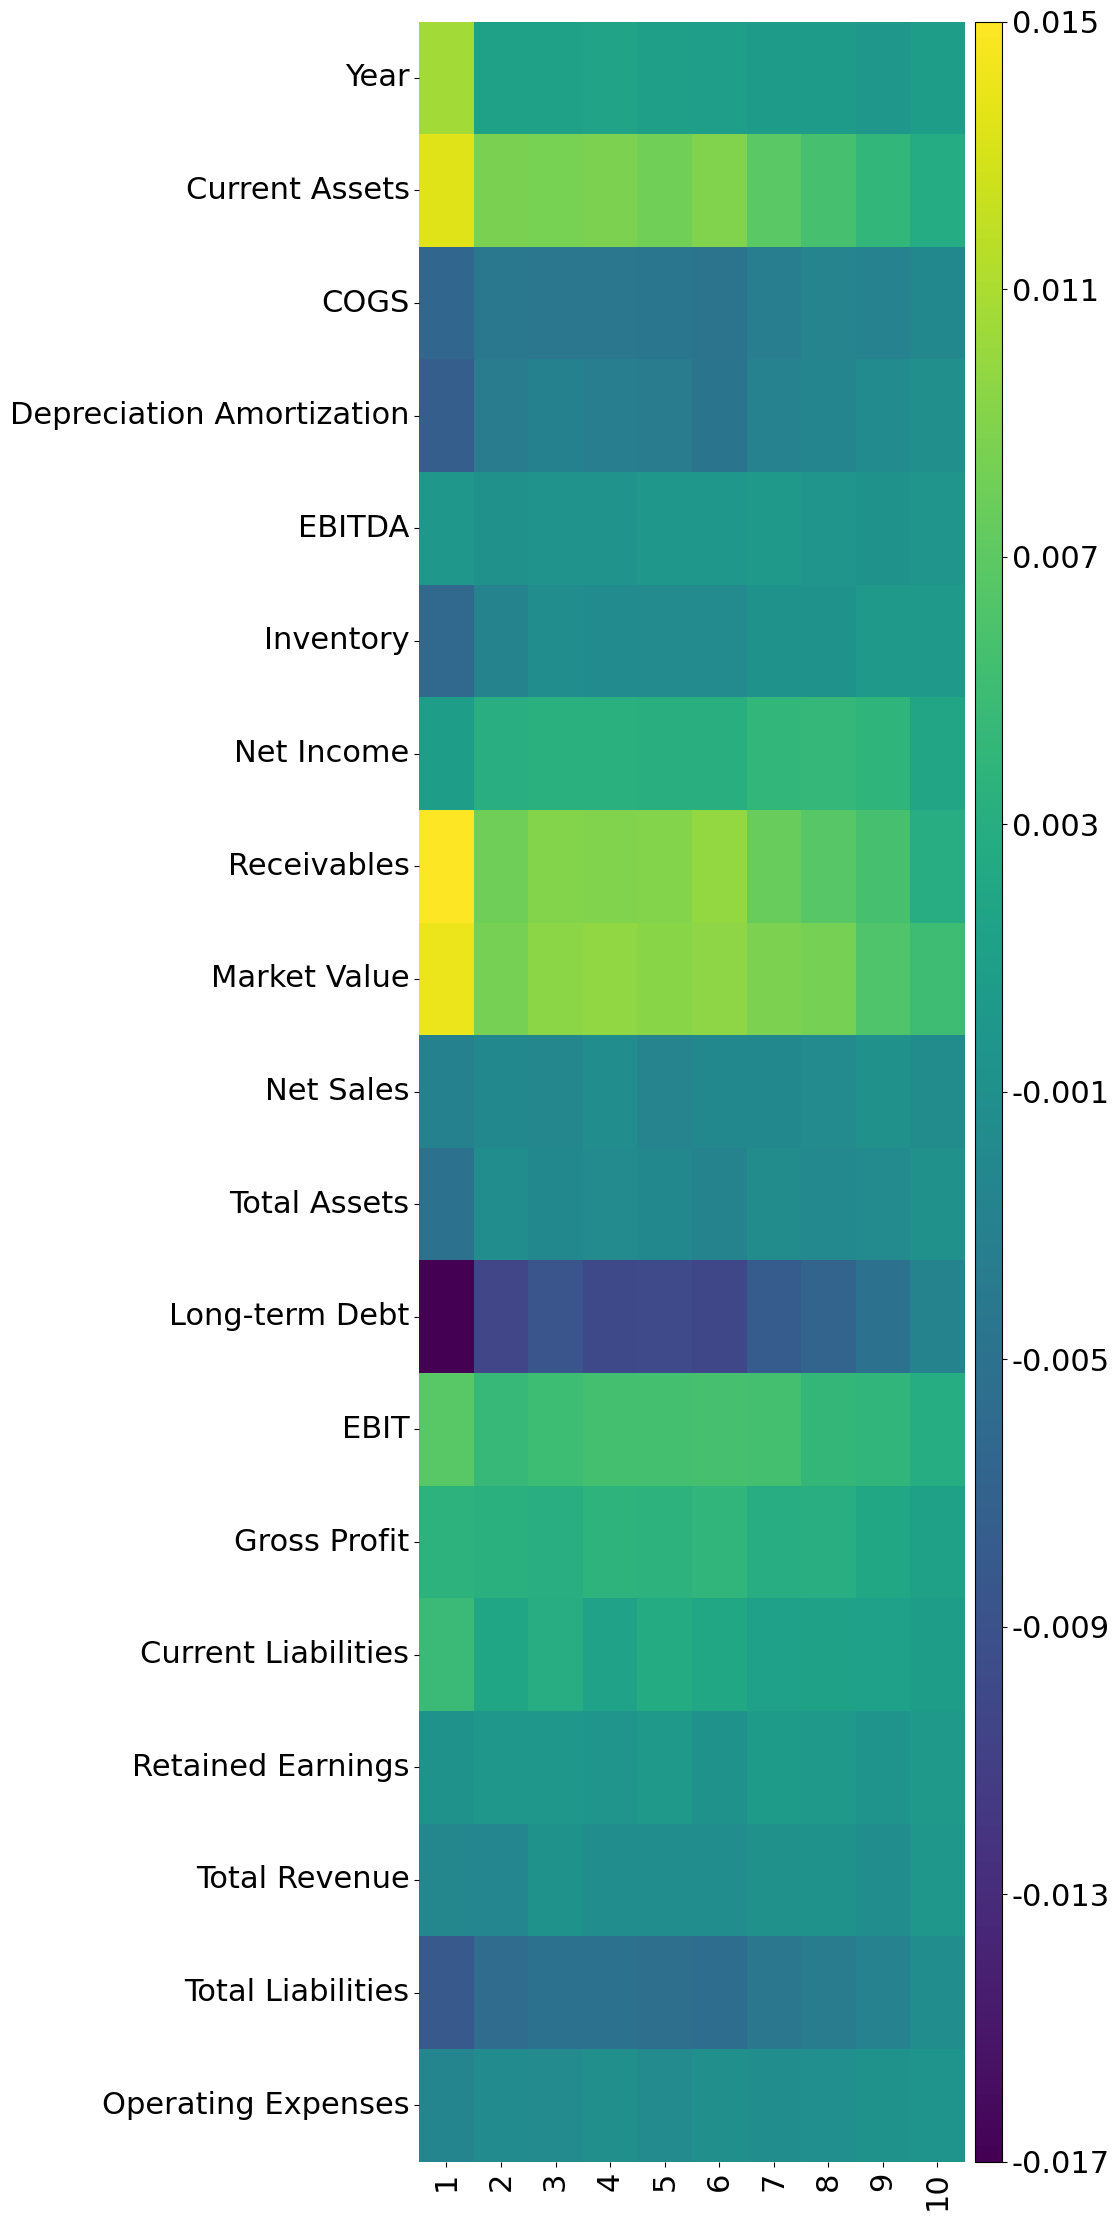

In [30]:
matrix_noamr = utils_visualizations_IT_SHAP.plot_shap(split_shap_noamr, features, reordered_indices, final_order,
                                                      f" ", time, save_img=False)

**Visualize the Non BANKRUPTCY data with normalization**

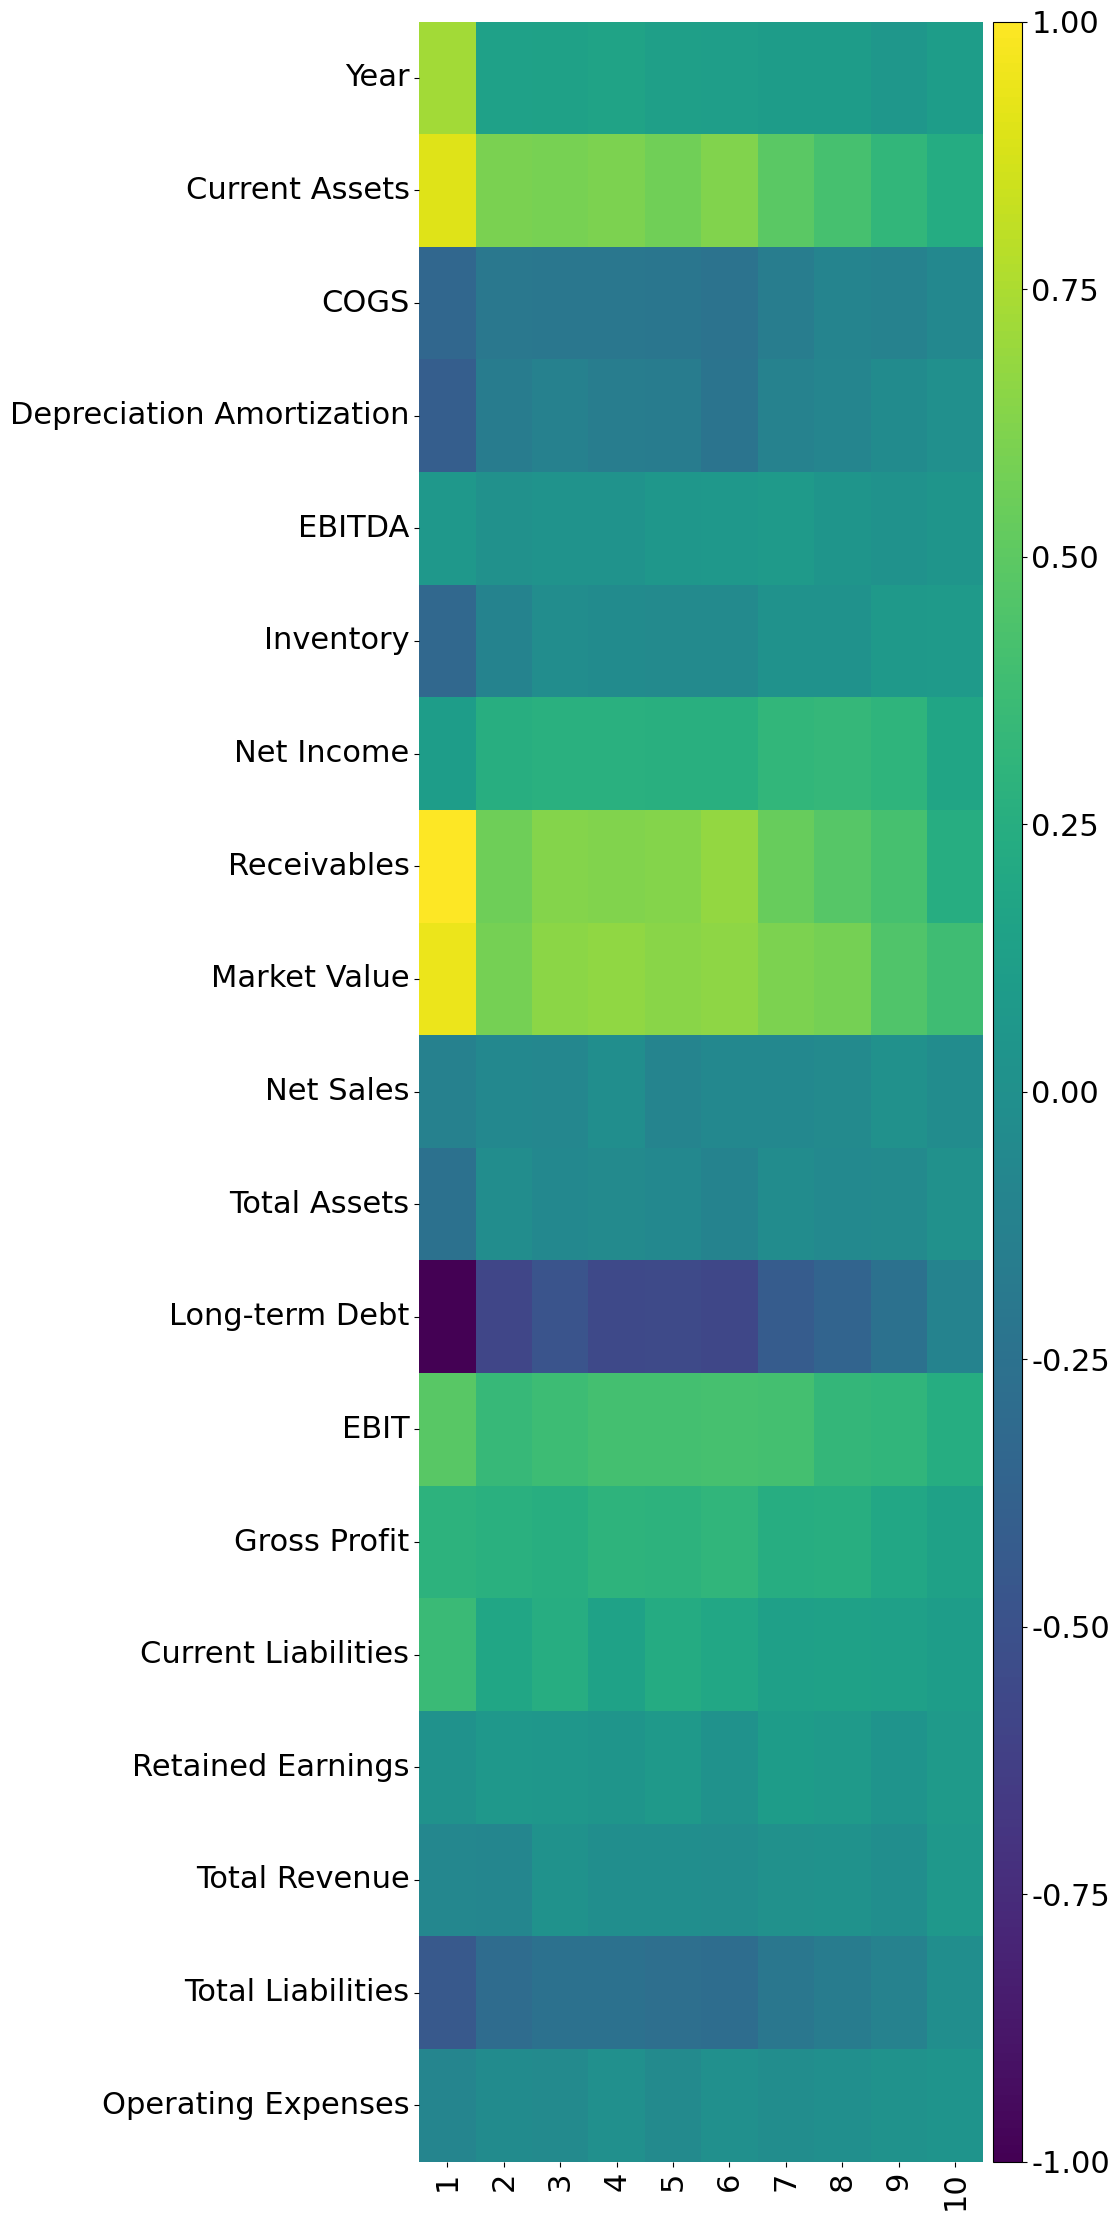

In [31]:
utils_visualizations_IT_SHAP.plot_shap_norm(matrix_pop, 
               matrix_noamr, 
               reordered_indices, 
               final_order,
               f"../Figures/POST-HOC/SHAP_{split}_nomdr_lstm.pdf",
               time,
               save_img=True
)